# 1 - Perkenalan

Nama : Fredyco Rizky

Batch : FTDS-018-RMT

Dataset : [Churn Dataset](https://raw.githubusercontent.com/H8-Assignments-Bay/p2---ftds-018-rmt---m1-Fredyco/main/churn.csv?token=GHSAT0AAAAAAB6CDYCSQBIOXXS3KVSZ3OQ2ZBEHIXQ)

Objective : Objective dari project kali ini adalah mencari model yang paling tepat untuk digunakan pada data [Churn Dataset](https://raw.githubusercontent.com/H8-Assignments-Bay/p2---ftds-018-rmt---m1-Fredyco/main/churn.csv?token=GHSAT0AAAAAAB6CDYCSQBIOXXS3KVSZ3OQ2ZBEHIXQ), dengan tujuan model untuk mempelajari pola dalam memprediksi apakah Customer berpotensi untuk Churn atau tidak. Yang akan digunakan untuk memprediksi apakah Customer berpotensi untuk Churn atau tidak dari data baru.

# 2 - Import Libraries

In [165]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, precision_score, accuracy_score

import pickle
import json

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # Atur agar semua kolom ter load

# 3 - Data Loading

Data yang digunakan berasal dari [github](https://raw.githubusercontent.com/H8-Assignments-Bay/p2---ftds-018-rmt---m1-Fredyco/main/churn.csv?token=GHSAT0AAAAAAB6CDYCSQBIOXXS3KVSZ3OQ2ZBEHIXQ)

In [2]:
df = pd.read_csv('churn.csv')

Cek 10 data pertama dan 10 data terakhir

In [3]:
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [4]:
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


Cek apakah ada data yang missing atau terduplicated

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [6]:
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Dari data diatas didapatkan bahwa ada data yang missing

## 3.1 - Making New Column

### 3.1.1 - Umur

Membuat kolom umur untuk mengurangi jumlah variabel unik yang ada pada kolom `age`. Sehingga umur 1-5, 6-10 dan 11-15 dikelompokkan menjadi 1

In [7]:
umur = []
for x in df["age"]:
    angka = int((x-1)/5)
    umur.append(angka)
df["umur"] = umur

In [8]:
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,umur
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,5
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,9
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0,5
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1,12
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0,12


In [9]:
print("Jumlah data unique age sebelum grouping : ", len(df['age'].unique()))
print("Jumlah data unique age setelah grouping : ", len(df['umur'].unique()))

Jumlah data unique age sebelum grouping :  55
Jumlah data unique age setelah grouping :  12


Dari hasil diatas terlihat bahwa nilai unik pada kolom `age` berkurang 78% atau turun dari 55 jenis ke 12 jenis.

### 3.1.2 - Tanggal

Karena jenis data pada kolom joining_date masih object, kita convert terlebih dahulu ke date.

In [10]:
df["joining_date"] = pd.to_datetime(df["joining_date"])

Setelah di ubah menjadi bentuk date, kita buat kolom baru yaitu kolom `year_month` dimana isi dari kolom ini adalah hasil ektraks bulan dan tahun dari kolom `joining_date`.

In [11]:
df['year_month'] = df['joining_date'].dt.to_period('M')

In [12]:
print("Jumlah data unique joining date : ", len(df['joining_date'].unique()))
print("Jumlah data unique year month : ", len(df['year_month'].unique()))

Jumlah data unique joining date :  1096
Jumlah data unique year month :  36


Dari hasil diatas ditemukan bahwa nilai unik pada kolom `joining_date` turun 96% atau turun dari 1096 variabel unik menjadi 36.

# 4 - EDA

## 4.1 - Target Column

In [13]:
target = df["churn_risk_score"].value_counts().reset_index()
persen = df["churn_risk_score"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["churn_risk_score"]
target

,index,churn_risk_score,percentage
0,1,20018,0.540881
1,0,16992,0.459119


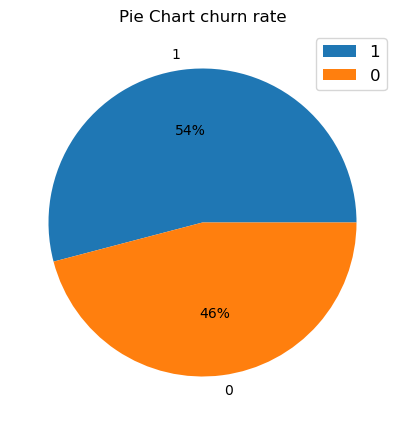

In [14]:
plt.figure(figsize=(7,5))


#sns.barplot(target["index"], target["percentage"])
plt.pie(target["percentage"], labels = target["index"], autopct='%.0f%%')
plt.title("Pie Chart churn rate")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

Dari data dan plot diatas didapatkan bahwa distribusi data pada kolom target atau dependen variable itu balance. Hal ini karena perbandingan rasio antara customer dengan resiko churn dan yang tidak beresiko churn itu 54:46.

## 4.2 - Categorical Column

Untuk memudahkan pembuatan pie chart untuk menganalisis distribusi data categorical, saya menggunakan funtcion yang saya dapatkan dari [StackOverFlow](https://stackoverflow.com/questions/73616867/python-seaborn-pie-chart-from-count-of-values-showing-the-percentage-too)

In [15]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

Untuk mempermudah dalam pembuatan plot maka data yang memiliki nilai churn risk yang sama dikumpulkan menjadi 1

In [16]:
df_0 = df[df['churn_risk_score'] == 0]
df_1 = df[df['churn_risk_score'] == 1]

### 4.2.1 - Column Used

#### 4.2.1.1 - `membership_category`

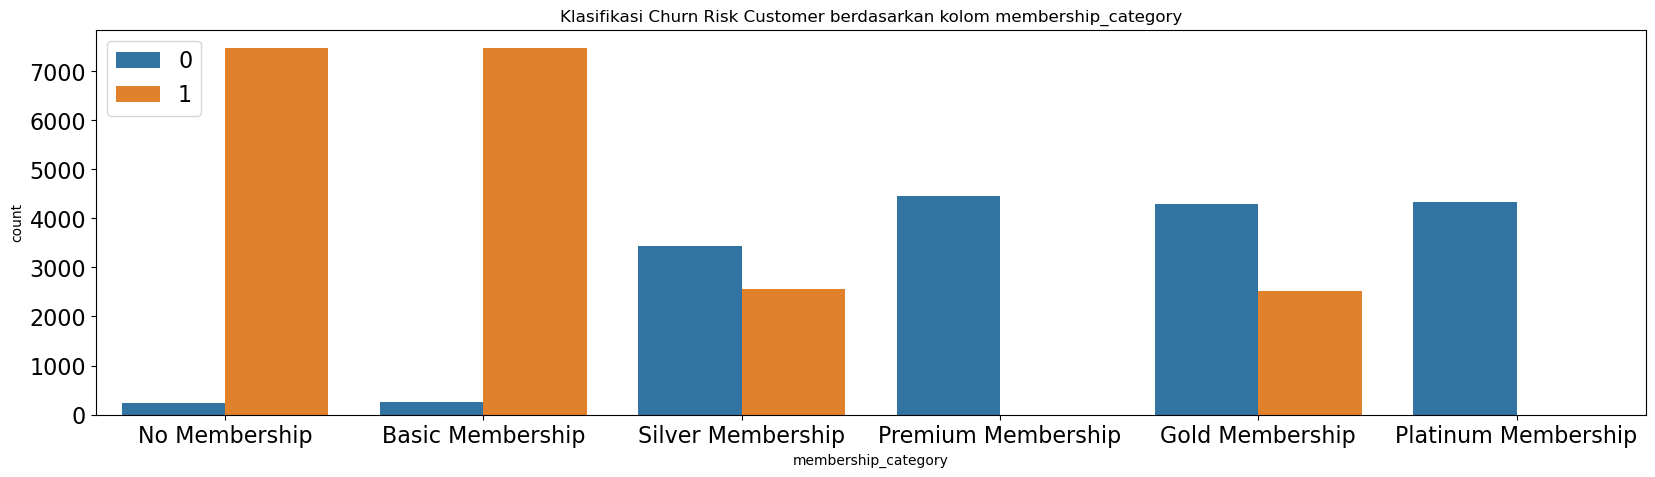

In [17]:
plt.figure(figsize=(20,5))

sns.countplot(df["membership_category"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom membership_category")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom membership_category')

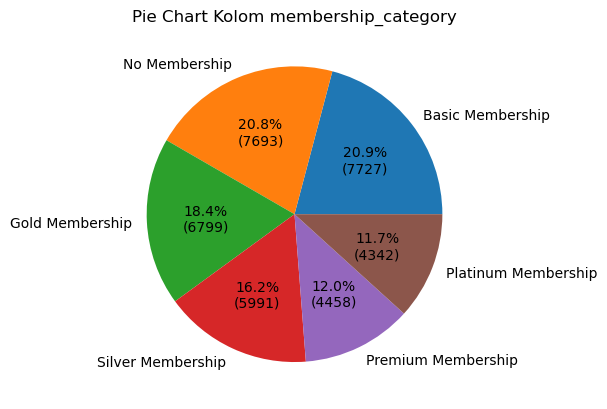

In [18]:
s = df['membership_category'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom membership_category")

Text(0.5, 1.0, 'Pie Chart Kolom membership_category yang memiliki churn risk 0')

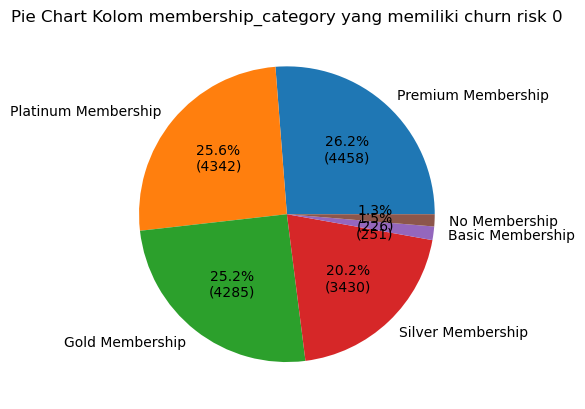

In [19]:
s = df_0['membership_category'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom membership_category yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom membership_category yang memiliki churn risk 1')

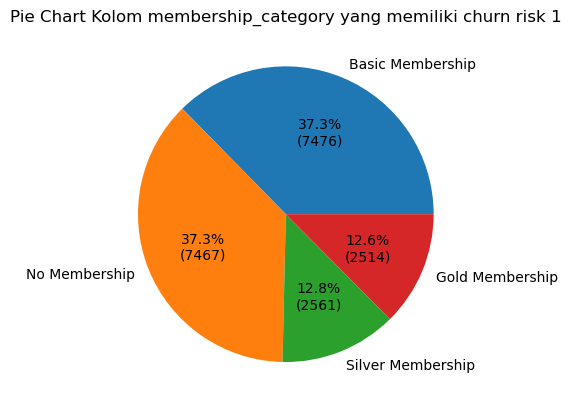

In [20]:
s = df_1['membership_category'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom membership_category yang memiliki churn risk 1")

Setelah dilakukan Eksplorasi didapatkan bahwa data pada kolom ini berpengaruh terhadap penentuan nilai churn risk, karena distribusi data yang memiliki nilai churn risk 0 sangatlah berbeda dengan distribusi data yang memiliki nilai churn risk 1. Oleh karena itu kolom ini akan digunakan dalam permodelan. Selain itu dari data dan plot diatas juga didapatkan bahwa customer dengan churn risk terendah adalah customer dengan category premium atau platinum membership. Hal ini dapat dibuktikan pada plot bahwa customer yang berlangganan premium atau platinum membership tidak ada yang memiliki churn risk.

#### 4.2.1.2 - `feedback`

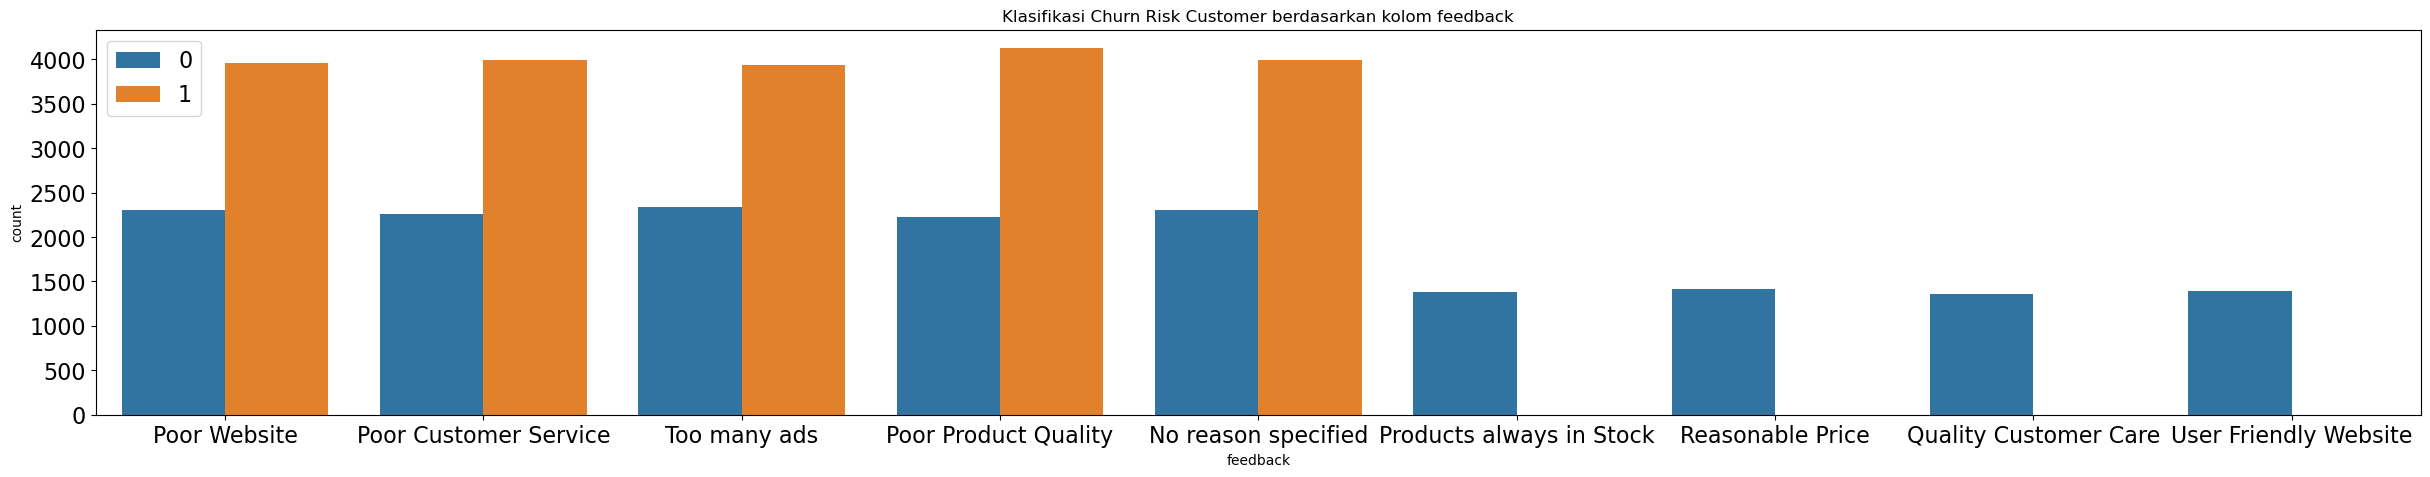

In [21]:
plt.figure(figsize=(30,5))

sns.countplot(df["feedback"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom feedback")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom feedback')

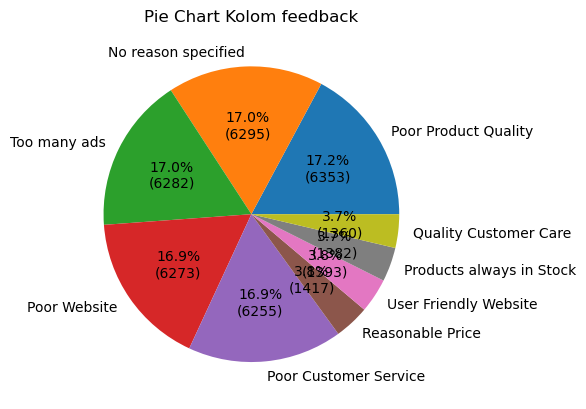

In [22]:
s = df['feedback'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom feedback")

Text(0.5, 1.0, 'Pie Chart Kolom feedback yang memiliki churn risk 0')

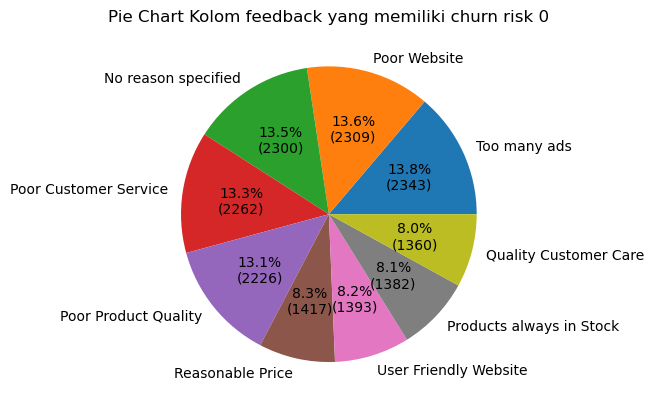

In [23]:
s = df_0['feedback'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom feedback yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom feedback yang memiliki churn risk 1')

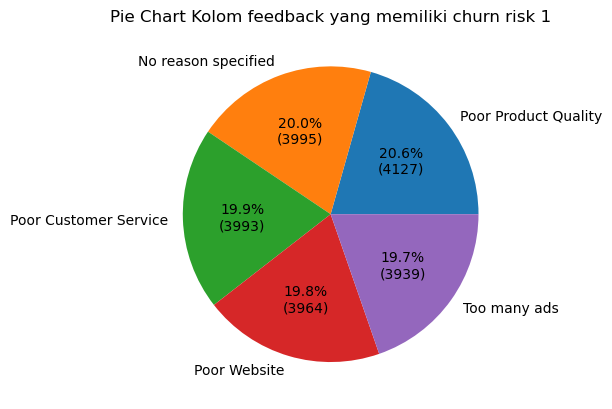

In [24]:
s = df_1['feedback'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom feedback yang memiliki churn risk 1")

Setelah dilakukan Eksplorasi didapatkan bahwa data pada kolom ini berpengaruh terhadap penentuan nilai churn risk, karena distribusi data yang memiliki nilai churn risk 0 sangatlah berbeda dengan distribusi data yang memiliki nilai churn risk 1. Oleh karena itu kolom ini akan digunakan dalam permodelan. Selain itu kita juga mendapatkan informasi bahwa customer yang meninggalkan feedback positif tidak memiliki resiko untuk churn. Sedangkan customer yang meninggalkan feedback negatif atau netral memiliki resiko untuk churn.

### 4.2.2 Column Dropped

#### 4.2.2.1 - `year_month`

In [25]:
tanggal = df.groupby(['year_month']).count()
tanggal_churn = df.groupby(["year_month"], as_index=False)["churn_risk_score"].value_counts()

In [26]:
tanggal_churn

,year_month,churn_risk_score,count
0,2015-01,1,579
1,2015-01,0,501
2,2015-02,1,501
3,2015-02,0,428
4,2015-03,1,564
...,...,...,...
67,2017-10,0,500
68,2017-11,1,549
69,2017-11,0,462
70,2017-12,1,595


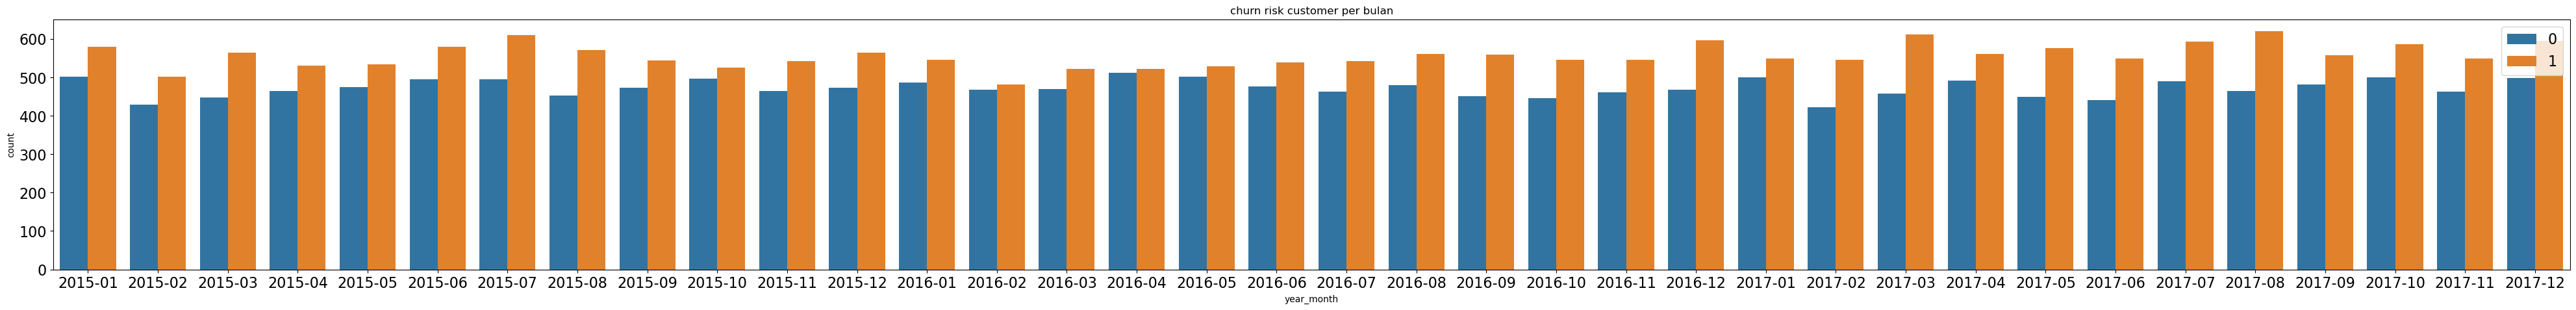

In [27]:
plt.figure(figsize=(50,5))

sns.countplot(df["year_month"], hue = df["churn_risk_score"], order=tanggal.index)
plt.title("churn risk customer per bulan")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


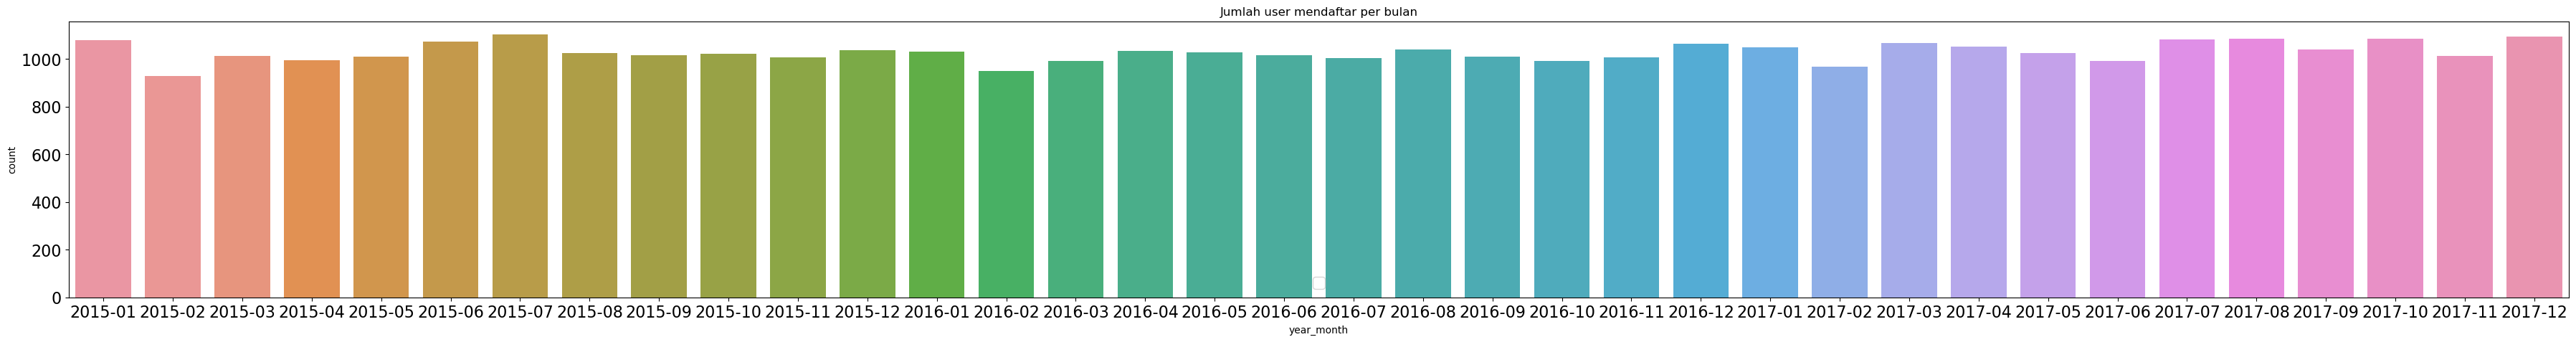

In [28]:
plt.figure(figsize=(45,5))

sns.countplot(x = df["year_month"], order=tanggal.index)
plt.title("Jumlah user mendaftar per bulan")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [29]:
print(tanggal['user_id'].max())
print(tanggal['user_id'].min())

1103
929


Dari data dan plot diatas didapatkan bahwa jumlah user yang mendaftar setiap bulannya cukup stagnan hal ini dapat diketahui dari selisih jumlah pendaftar maksimum pada satu bulan dan jumlah pendaftar minimum pada satu bulan hanya 174 pendaftar. Karena perubahan jumlah user setiap bulannya tidak terlalu berbeda secara signifikan maka kolom dapat di drop.

#### 4.2.2.2 - `gender`

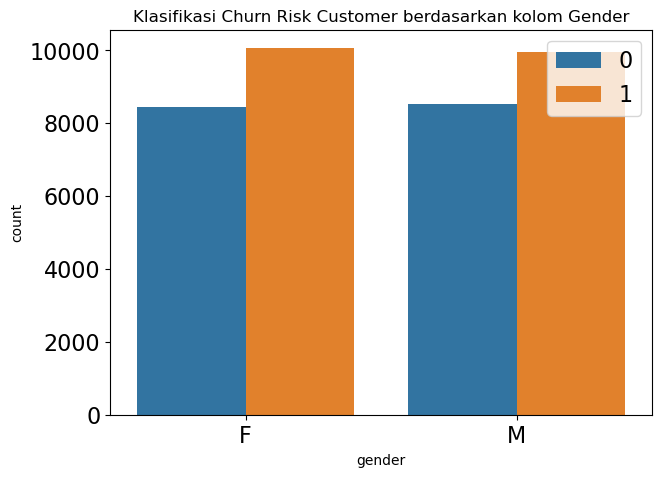

In [30]:
plt.figure(figsize=(7,5))

sns.countplot(df["gender"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom Gender")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom Gender')

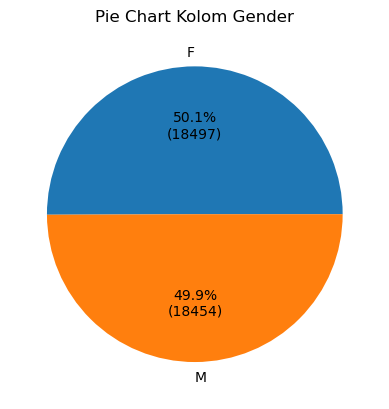

In [31]:
s = df['gender'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom Gender")

Text(0.5, 1.0, 'Pie Chart Kolom Gender yang memiliki churn risk 0')

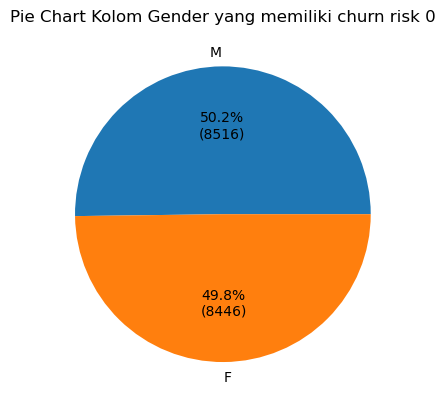

In [32]:
s = df_0['gender'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom Gender yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom Gender yang memiliki churn risk 1')

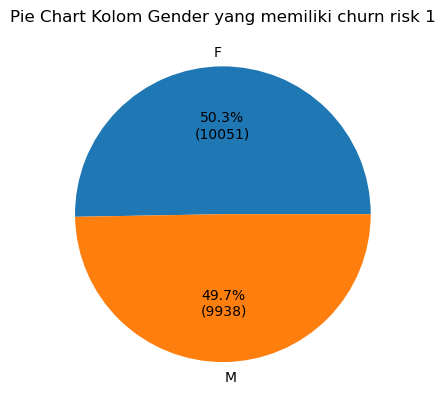

In [33]:
s = df_1['gender'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom Gender yang memiliki churn risk 1")

Karena pada kolom ini nilai distribusi data sangat seimbang dan distribusi data pada kolom ini sangatlah mirip saat data di group berdasarkan jenis churn risk yang sama. Maka data akan di drop karena data pada kolom ini tidak memiliki pengaruh besar terhadap penentuan nilai churn risk. Selain itu dari plot juga kita dapatkan bahwa lebih banyak customer female ddibanding male. akan tetapi customer Male memiliki tingkat churn risk yang lebih rendah dari female.

#### 4.2.2.3 - `region_category`

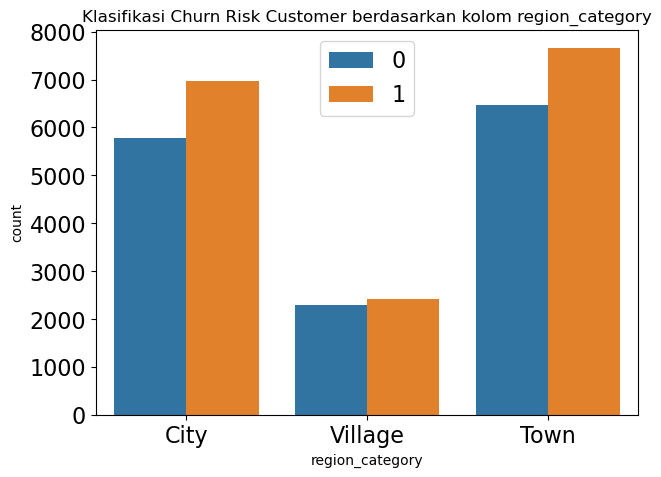

In [34]:
plt.figure(figsize=(7,5))

sns.countplot(df["region_category"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom region_category")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom region_category')

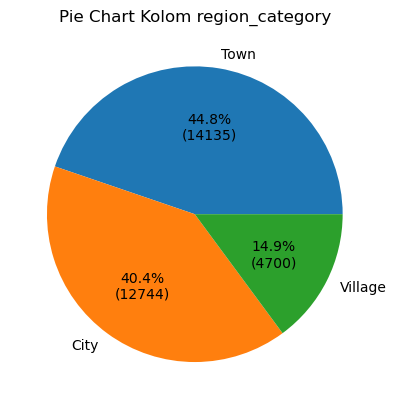

In [35]:
s = df['region_category'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom region_category")

Text(0.5, 1.0, 'Pie Chart Kolom region_category yang memiliki churn risk 0')

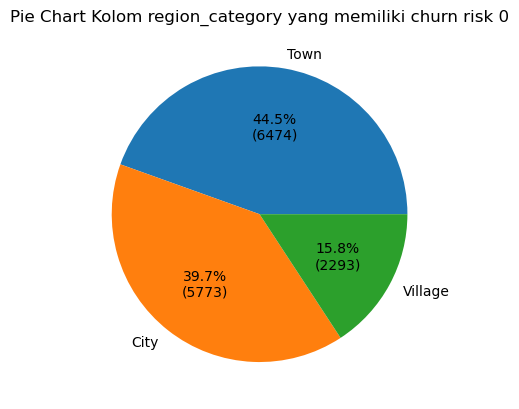

In [36]:
s = df_0['region_category'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom region_category yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom region_category yang memiliki churn risk 1')

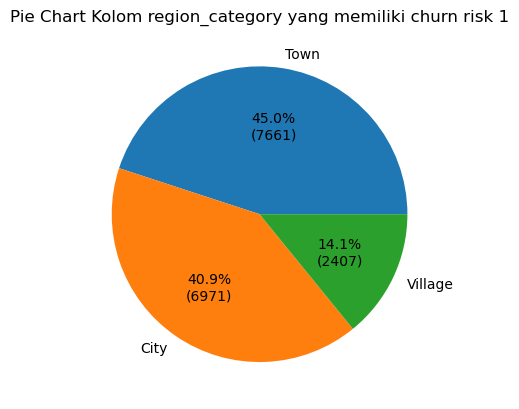

In [37]:
s = df_1['region_category'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom region_category yang memiliki churn risk 1")

Karena pada kolom ini nilai distribusi data sangat seimbang dan distribusi data pada kolom ini sangatlah mirip saat data di group berdasarkan jenis churn risk yang sama. Maka data akan di drop karena data pada kolom ini tidak memiliki pengaruh besar terhadap penentuan nilai churn risk. Selain itu juga didapatkan bahwa mayoritas customer berasal dari wilayah `town`. Dan customer yang berasal dari `village` merupakan segmen konsumen yang paling kecil.

#### 4.2.2.4 - `joined_through_referral`

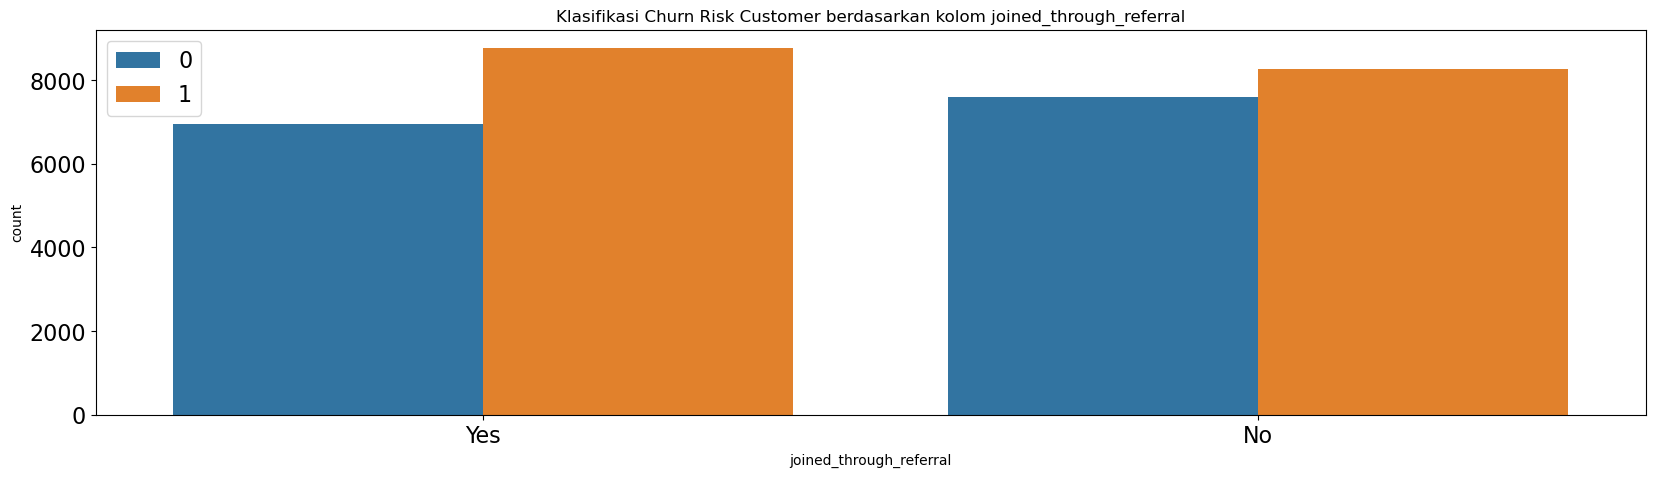

In [38]:
plt.figure(figsize=(20,5))

sns.countplot(df["joined_through_referral"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom joined_through_referral")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom joined_through_referral')

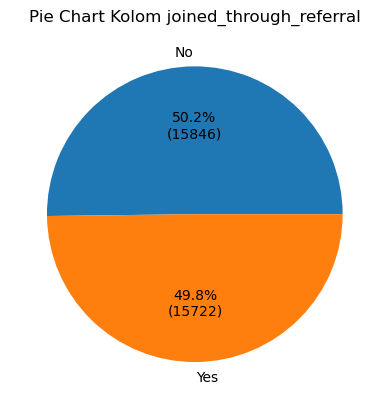

In [39]:
s = df['joined_through_referral'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom joined_through_referral")

Text(0.5, 1.0, 'Pie Chart Kolom joined_through_referral yang memiliki churn risk 0')

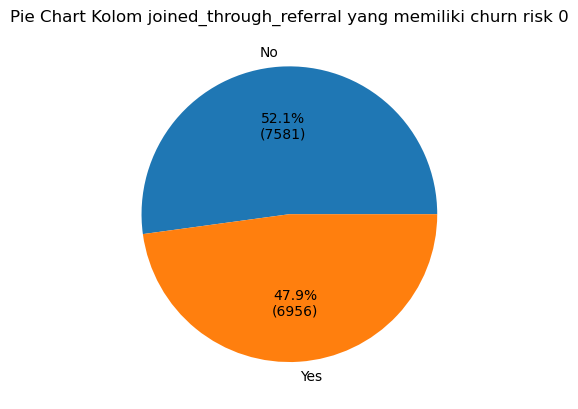

In [40]:
s = df_0['joined_through_referral'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom joined_through_referral yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom joined_through_referral yang memiliki churn risk 1')

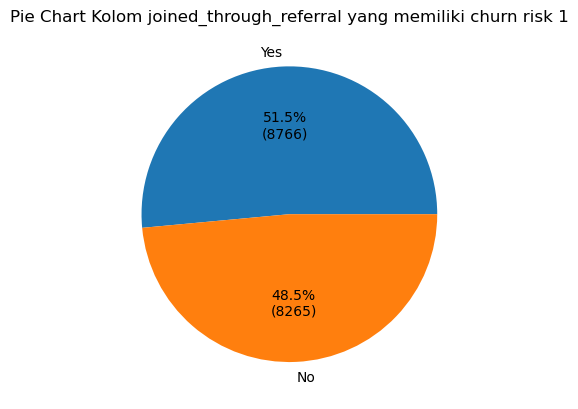

In [41]:
s = df_1['joined_through_referral'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom joined_through_referral yang memiliki churn risk 1")

Karena pada kolom ini nilai distribusi data sangat seimbang dan distribusi data pada kolom ini sangatlah mirip saat data di group berdasarkan jenis churn risk yang sama. Maka data akan di drop karena data pada kolom ini tidak memiliki pengaruh besar terhadap penentuan nilai churn risk. Selain itu kita juga mendapatkan informasi bahwa orang yang mendaftar melalui referral code memiliki peluang lebih besar untuk churn.

#### 4.2.2.5 - `preferred_offer_types`

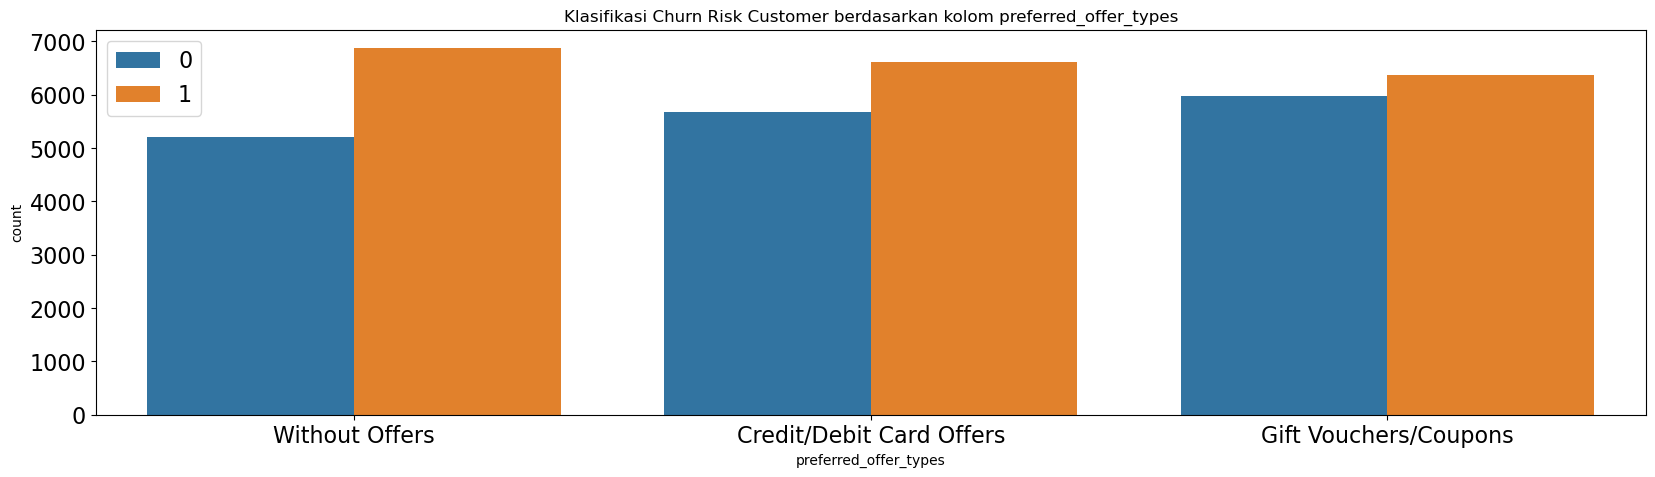

In [42]:
plt.figure(figsize=(20,5))

sns.countplot(df["preferred_offer_types"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom preferred_offer_types")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom preferred_offer_types')

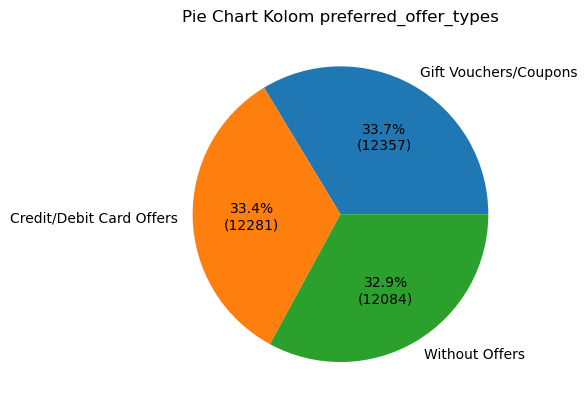

In [43]:
s = df['preferred_offer_types'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom preferred_offer_types")

Text(0.5, 1.0, 'Pie Chart Kolom preferred_offer_types yang memiliki churn risk 0')

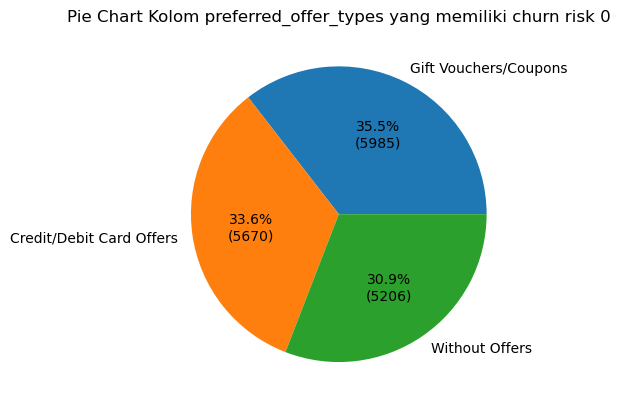

In [44]:
s = df_0['preferred_offer_types'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom preferred_offer_types yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom preferred_offer_types yang memiliki churn risk 1')

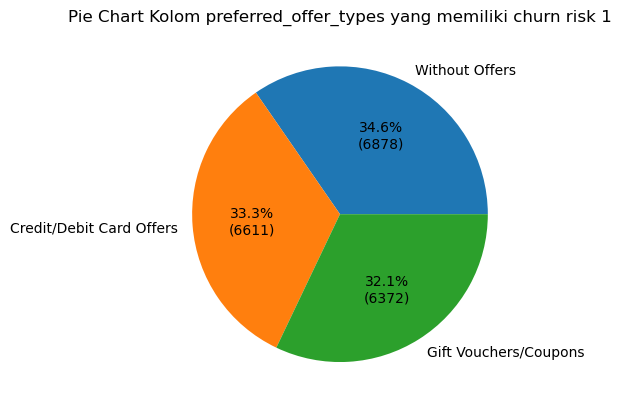

In [45]:
s = df_1['preferred_offer_types'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom preferred_offer_types yang memiliki churn risk 1")

Karena pada kolom ini nilai distribusi data sangat seimbang dan distribusi data pada kolom ini sangatlah mirip saat data di group berdasarkan jenis churn risk yang sama. Maka data akan di drop karena data pada kolom ini tidak memiliki pengaruh besar terhadap penentuan nilai churn risk. Selain itu dapat didapatkan informasi bahwa customer paling banyak mendaftar tanpa mengetahui adanya promo. Yang berarti promo masih kurang efektif.

#### 4.2.2.6 - `medium_of_operation`

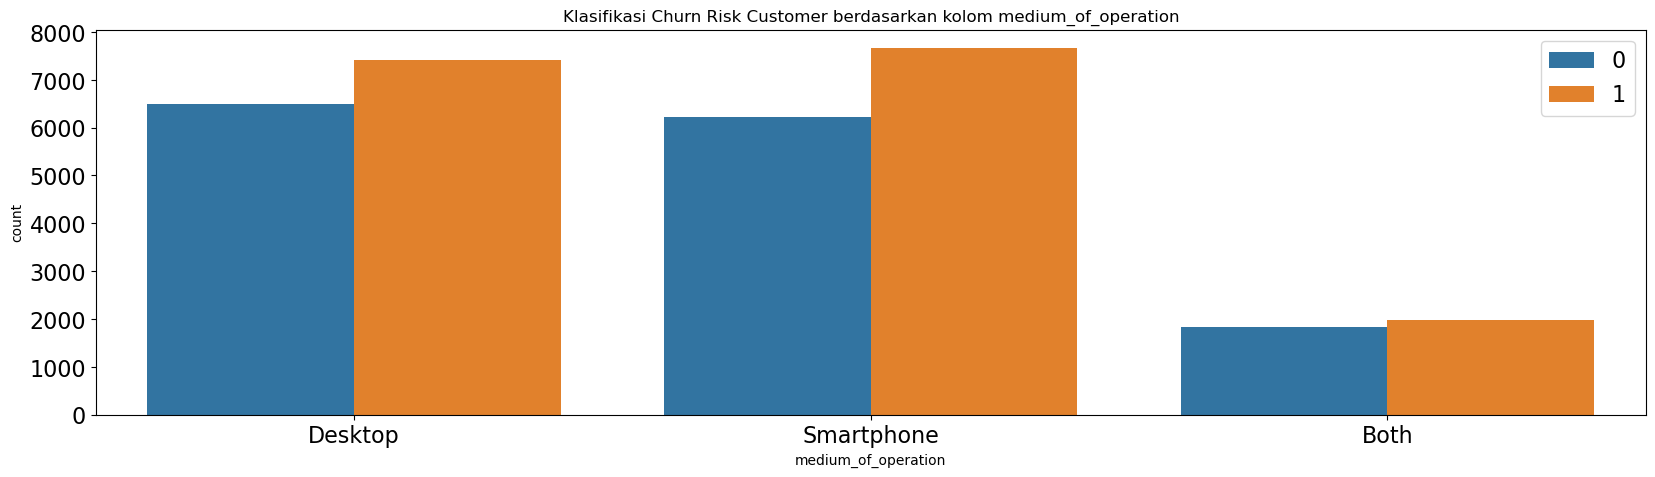

In [46]:
plt.figure(figsize=(20,5))

sns.countplot(df["medium_of_operation"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom medium_of_operation")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom medium_of_operation')

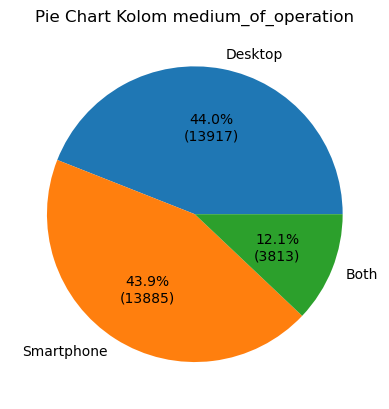

In [47]:
s = df['medium_of_operation'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom medium_of_operation")

Text(0.5, 1.0, 'Pie Chart Kolom medium_of_operation yang memiliki churn risk 0')

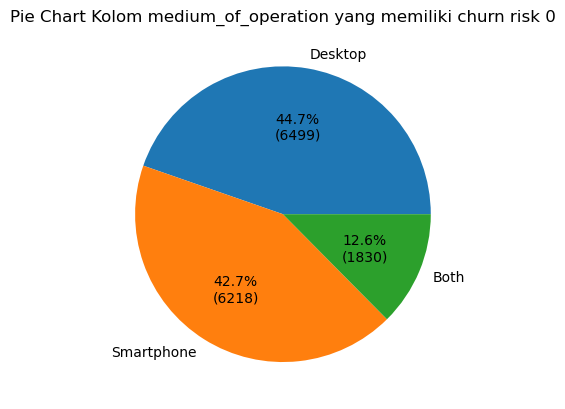

In [48]:
s = df_0['medium_of_operation'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom medium_of_operation yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom medium_of_operation yang memiliki churn risk 1')

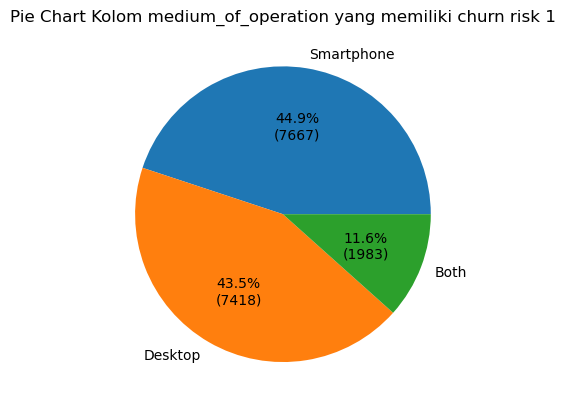

In [49]:
s = df_1['medium_of_operation'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom medium_of_operation yang memiliki churn risk 1")

Karena pada kolom ini nilai distribusi data sangat seimbang dan distribusi data pada kolom ini sangatlah mirip saat data di group berdasarkan jenis churn risk yang sama. Maka data akan di drop karena data pada kolom ini tidak memiliki pengaruh besar terhadap penentuan nilai churn risk. Selain itu dari plot diatas dapat diketahui bahwa user yang menggunakan Smartphone atau Dekstop merupakan mayoritas. Sedangkan user yang menggunakan keduanya hanyalah minoritas.

#### 4.2.2.7 - `internet_option`

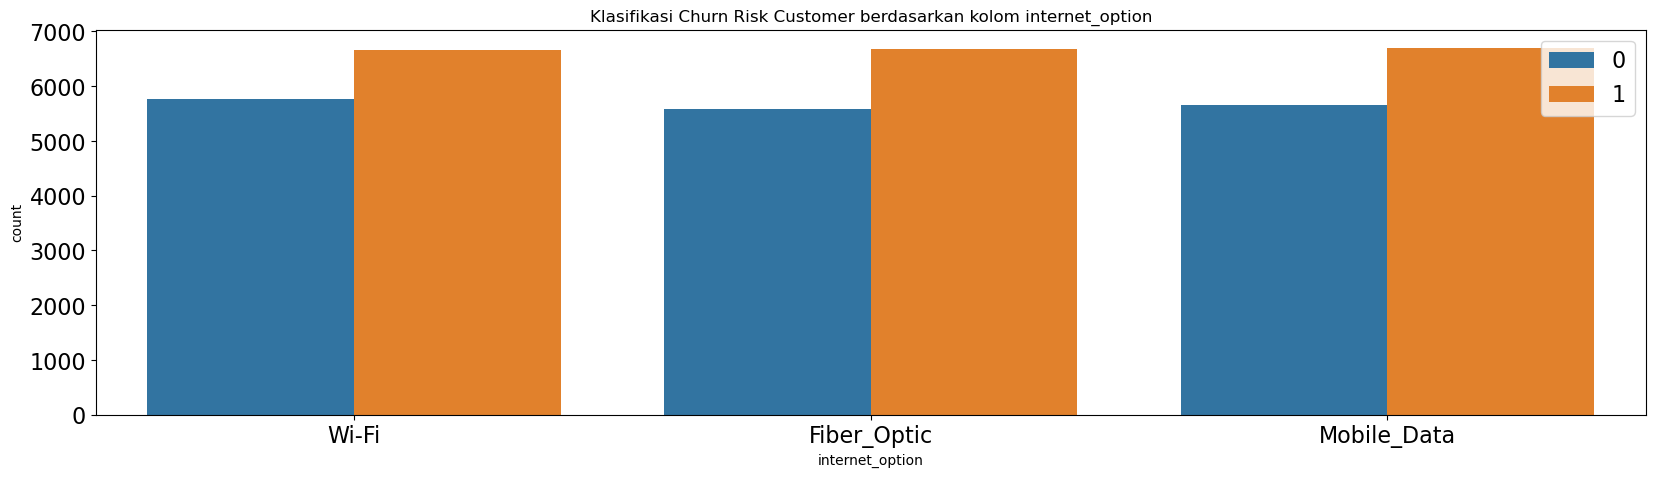

In [50]:
plt.figure(figsize=(20,5))

sns.countplot(df["internet_option"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom internet_option")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom internet_option')

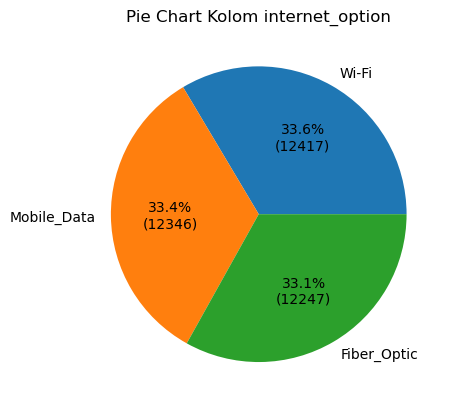

In [51]:
s = df['internet_option'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom internet_option")

Text(0.5, 1.0, 'Pie Chart Kolom internet_option yang memiliki churn risk 0')

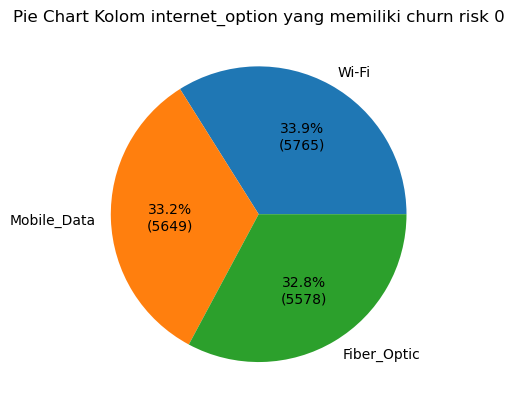

In [52]:
s = df_0['internet_option'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom internet_option yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom internet_option yang memiliki churn risk 1')

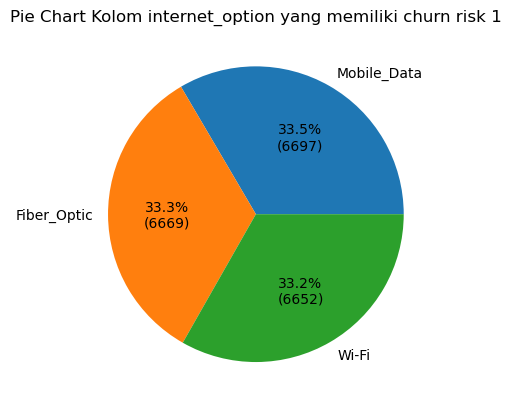

In [53]:
s = df_1['internet_option'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom internet_option yang memiliki churn risk 1")

Karena pada kolom ini nilai distribusi data sangat seimbang dan distribusi data pada kolom ini sangatlah mirip saat data di group berdasarkan jenis churn risk yang sama. Maka data akan di drop karena data pada kolom ini tidak memiliki pengaruh besar terhadap penentuan nilai churn risk. Selain itu didapatkan informasi bahwa nilai churn risk tidak bisa di tebak melalui kolom internet_option karena customer yang menggunakan internet option mobile_data, fiber_optic ataupun wi-fi memiliki jumlah yang hampir sama.

#### 4.2.2.8 - `used_special_discount`

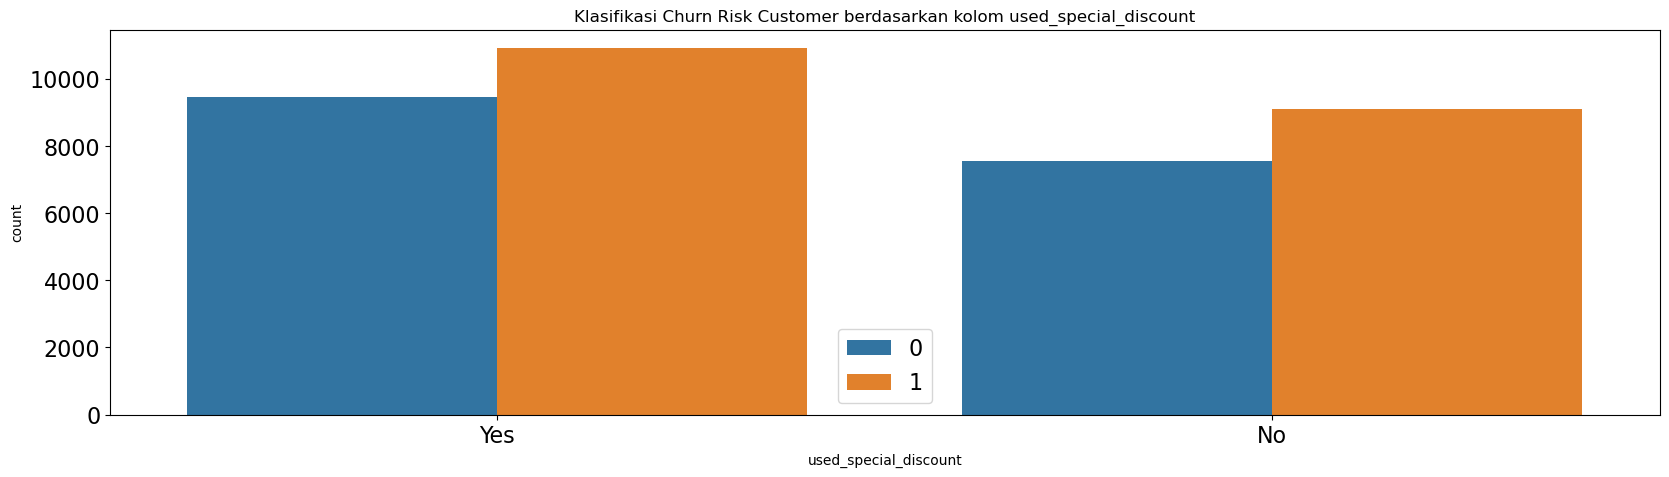

In [54]:
plt.figure(figsize=(20,5))

sns.countplot(df["used_special_discount"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom used_special_discount")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom used_special_discount')

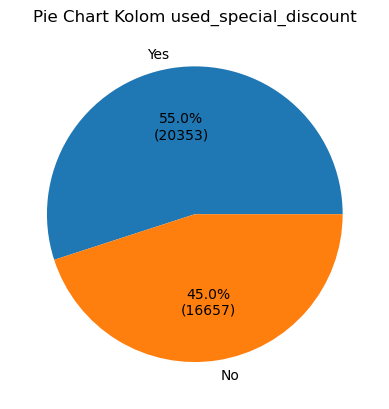

In [55]:
s = df['used_special_discount'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom used_special_discount")

Text(0.5, 1.0, 'Pie Chart Kolom used_special_discount yang memiliki churn risk 0')

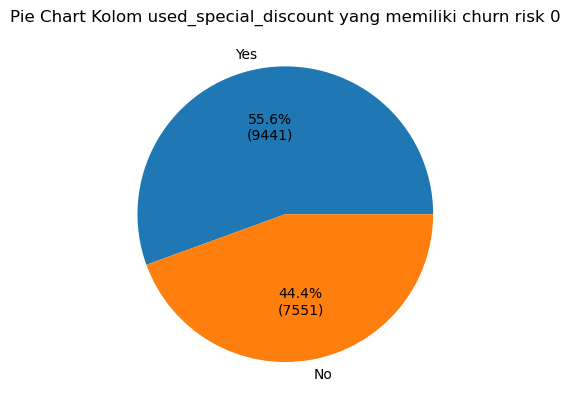

In [56]:
s = df_0['used_special_discount'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom used_special_discount yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom used_special_discount yang memiliki churn risk 1')

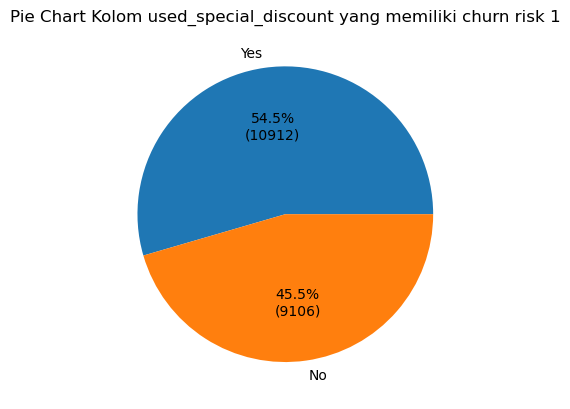

In [57]:
s = df_1['used_special_discount'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom used_special_discount yang memiliki churn risk 1")

Karena pada kolom ini nilai distribusi data sangat seimbang dan distribusi data pada kolom ini sangatlah mirip saat data di group berdasarkan jenis churn risk yang sama. Maka data akan di drop karena data pada kolom ini tidak memiliki pengaruh besar terhadap penentuan nilai churn risk. Selain itu dari plot diatas didapatkan bahwa mayoritas pendaftar mendaftar menggunakan discount khusus.

#### 4.2.2.9 - `offer_application_preference`

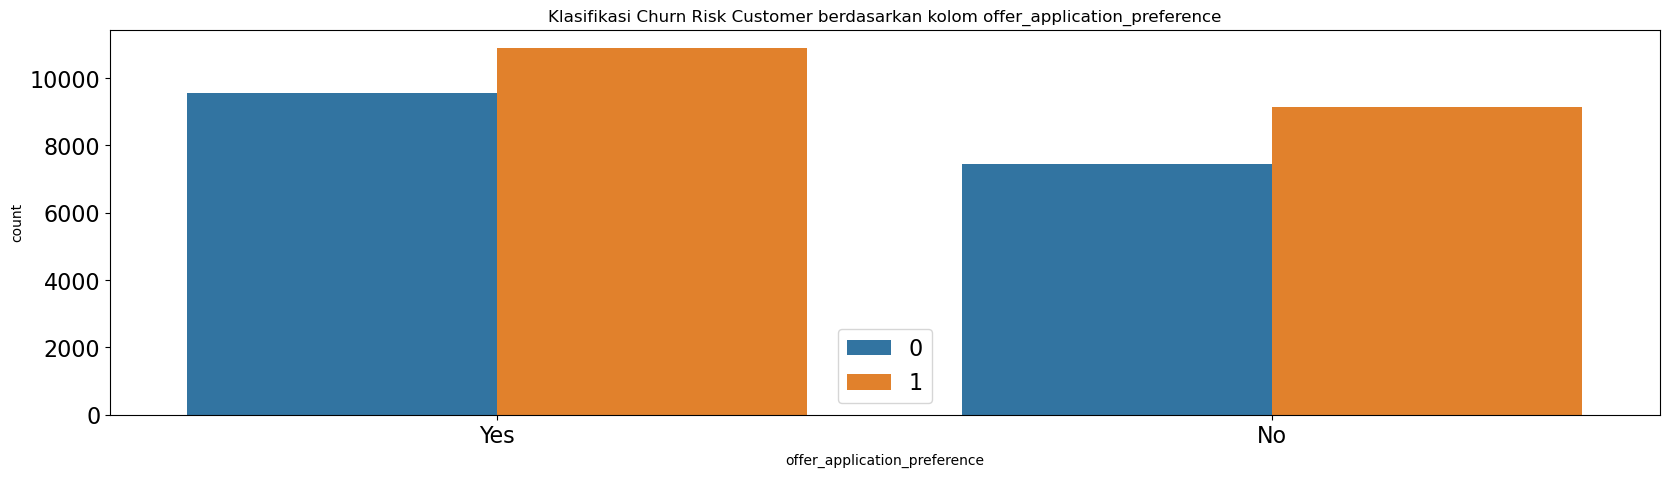

In [58]:
plt.figure(figsize=(20,5))

sns.countplot(df["offer_application_preference"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom offer_application_preference")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom offer_application_preference')

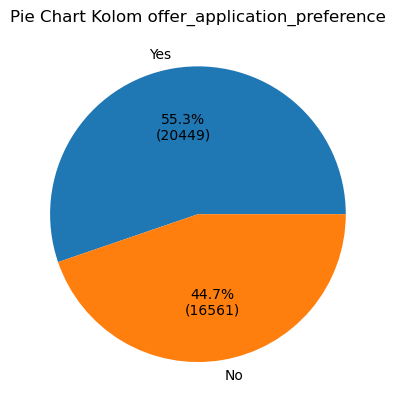

In [59]:
s = df['offer_application_preference'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom offer_application_preference")

Text(0.5, 1.0, 'Pie Chart Kolom offer_application_preference yang memiliki churn risk 0')

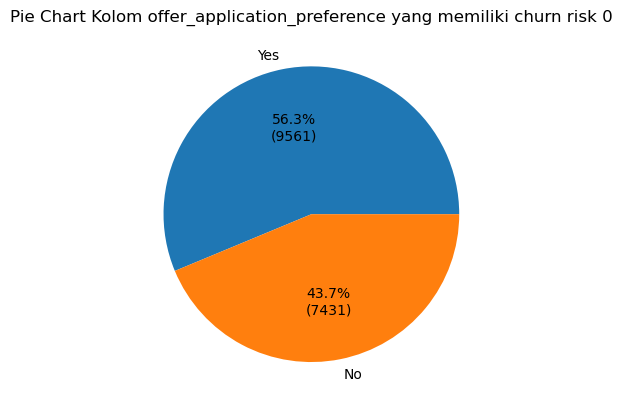

In [60]:
s = df_0['offer_application_preference'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom offer_application_preference yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom offer_application_preference yang memiliki churn risk 1')

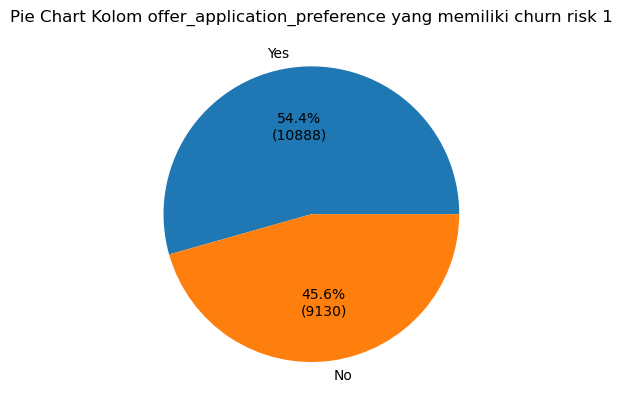

In [61]:
s = df_1['offer_application_preference'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom offer_application_preference yang memiliki churn risk 1")

Karena pada kolom ini nilai distribusi data sangat seimbang dan distribusi data pada kolom ini sangatlah mirip saat data di group berdasarkan jenis churn risk yang sama. Maka data akan di drop karena data pada kolom ini tidak memiliki pengaruh besar terhadap penentuan nilai churn risk. Selain itu didapatkan bahwa customer lebih senang jika dikirimkan penawaran yang sesuai dengan prefrensi.

#### 4.2.2.10 - `past_complaint`

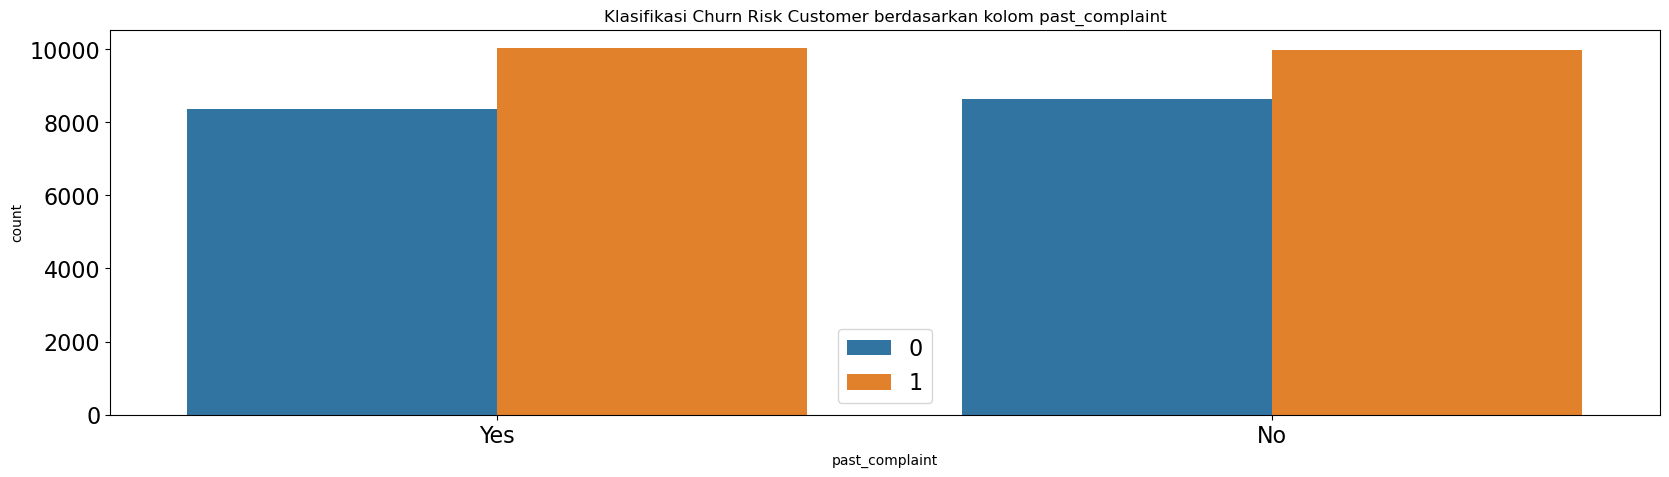

In [62]:
plt.figure(figsize=(20,5))

sns.countplot(df["past_complaint"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom past_complaint")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom past_complaint')

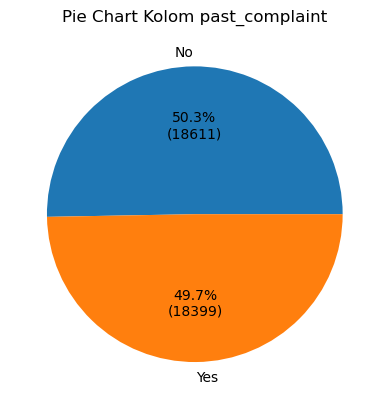

In [63]:
s = df['past_complaint'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom past_complaint")

Text(0.5, 1.0, 'Pie Chart Kolom past_complaint yang memiliki churn risk 0')

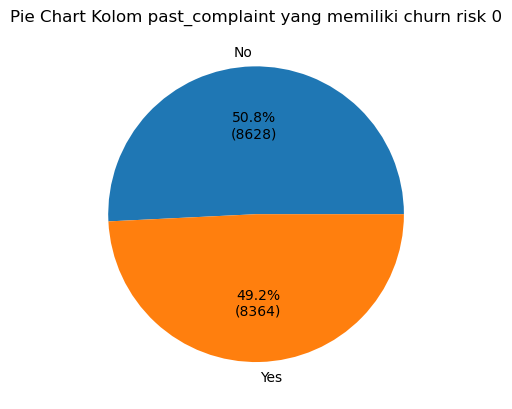

In [64]:
s = df_0['past_complaint'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom past_complaint yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom past_complaint yang memiliki churn risk 1')

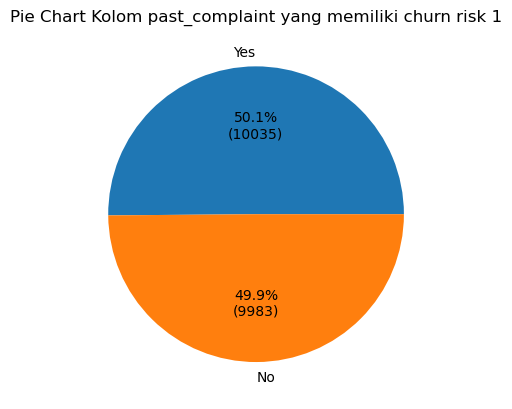

In [65]:
s = df_1['past_complaint'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom past_complaint yang memiliki churn risk 1")

Karena pada kolom ini nilai distribusi data sangat seimbang dan distribusi data pada kolom ini sangatlah mirip saat data di group berdasarkan jenis churn risk yang sama. Maka data akan di drop karena data pada kolom ini tidak memiliki pengaruh besar terhadap penentuan nilai churn risk. Selain itu didapatkan bahwa customer yang memiliki riwayat complaint memiliki kemungkinan lebih besar untuk beresiko churn.

#### 4.2.2.11 - `complaint_status`

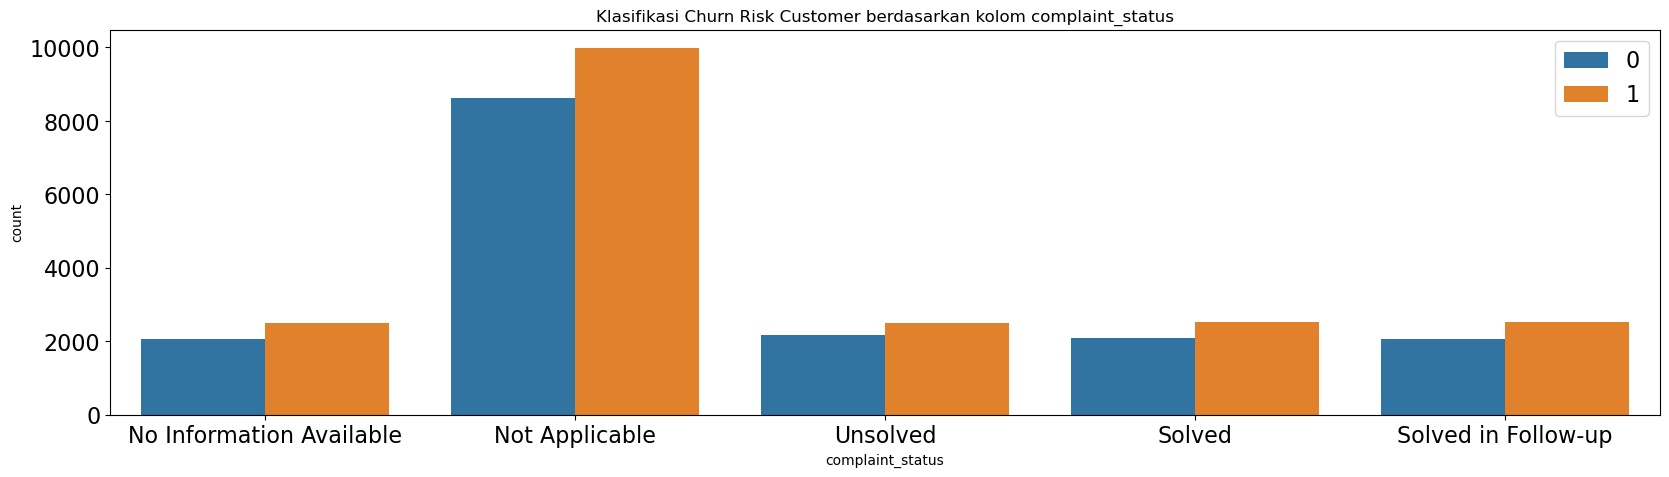

In [66]:
plt.figure(figsize=(20,5))

sns.countplot(df["complaint_status"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom complaint_status")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom complaint_status')

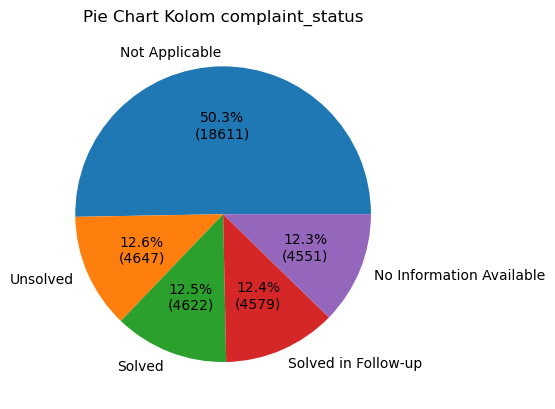

In [67]:
s = df['complaint_status'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom complaint_status")

Text(0.5, 1.0, 'Pie Chart Kolom complaint_status yang memiliki churn risk 0')

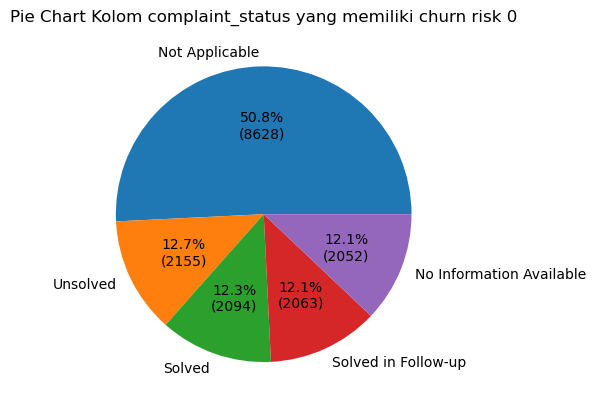

In [68]:
s = df_0['complaint_status'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom complaint_status yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom complaint_status yang memiliki churn risk 1')

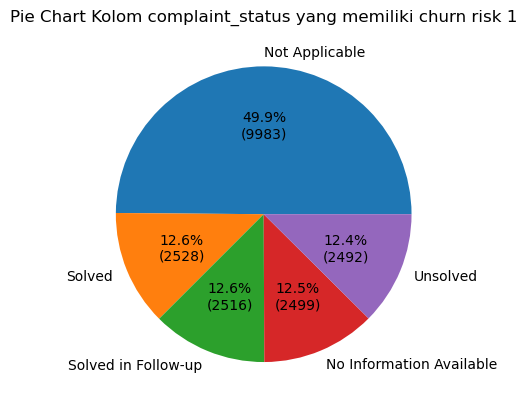

In [69]:
s = df_1['complaint_status'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom complaint_status yang memiliki churn risk 1")

Karena pada kolom ini nilai distribusi data sangat seimbang dan distribusi data pada kolom ini sangatlah mirip saat data di group berdasarkan jenis churn risk yang sama. Maka data akan di drop karena data pada kolom ini tidak memiliki pengaruh besar terhadap penentuan nilai churn risk. Selain itu dapat didapatkan bahwa mayoritas komplain yang masuk itu tidak applicable.

#### 4.2.2.12 - `umur`

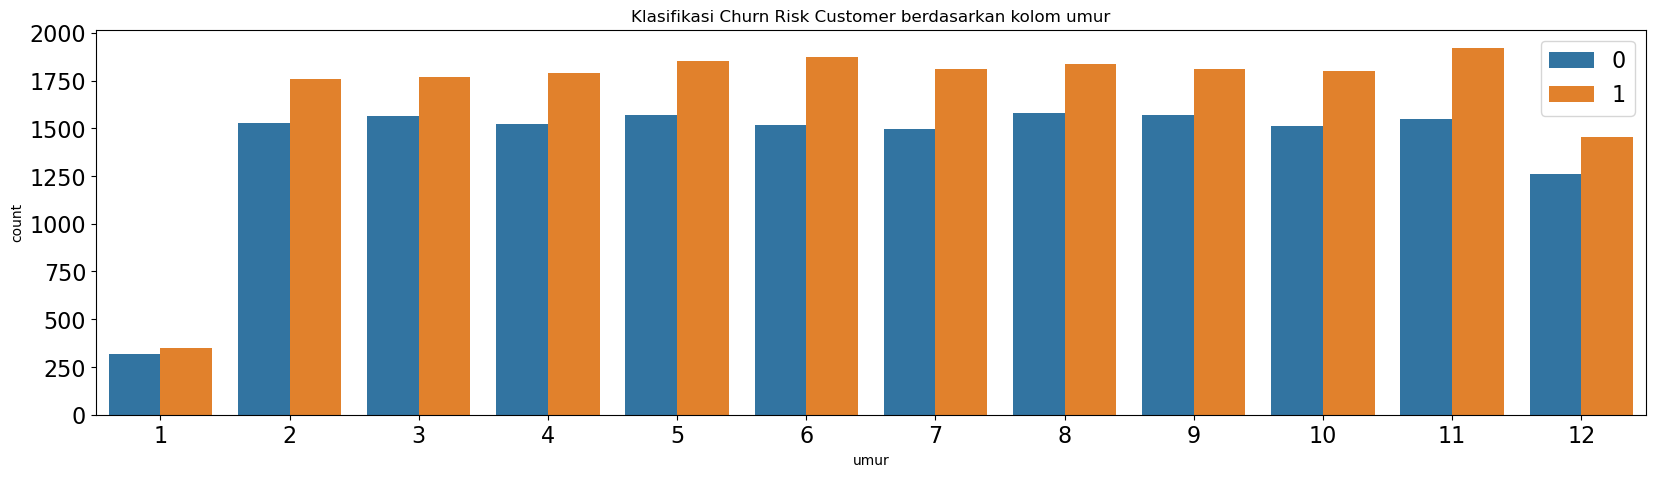

In [70]:
plt.figure(figsize=(20,5))

sns.countplot(df["umur"], hue = df["churn_risk_score"])
plt.title("Klasifikasi Churn Risk Customer berdasarkan kolom umur")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Pie Chart Kolom umur')

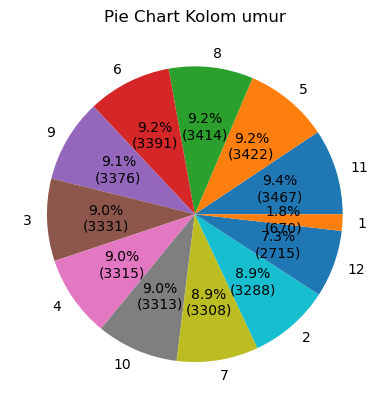

In [71]:
s = df['umur'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom umur")

Text(0.5, 1.0, 'Pie Chart Kolom umur yang memiliki churn risk 0')

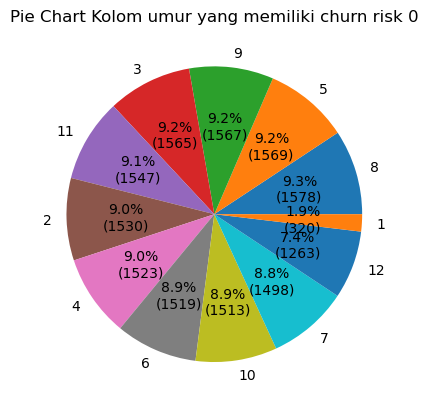

In [72]:
s = df_0['umur'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom umur yang memiliki churn risk 0")

Text(0.5, 1.0, 'Pie Chart Kolom umur yang memiliki churn risk 1')

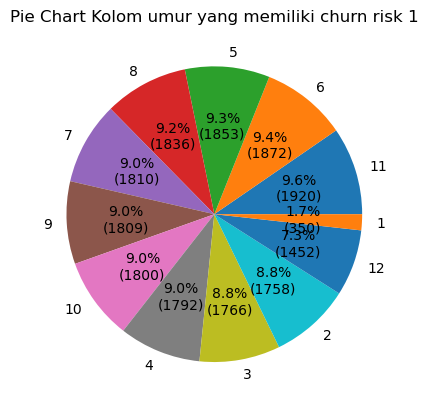

In [73]:
s = df_1['umur'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Pie Chart Kolom umur yang memiliki churn risk 1")

Karena pada kolom ini nilai distribusi data sangat seimbang dan distribusi data pada kolom ini sangatlah mirip saat data di group berdasarkan jenis churn risk yang sama. Maka data akan di drop karena data pada kolom ini tidak memiliki pengaruh besar terhadap penentuan nilai churn risk. Selain itu didapatkan bahwa umur tidak terlalu berpengaruh besar terhadapan churn risk.

## 4.3 - Numerical Column

### 4.3.1 `days_since_last_login`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


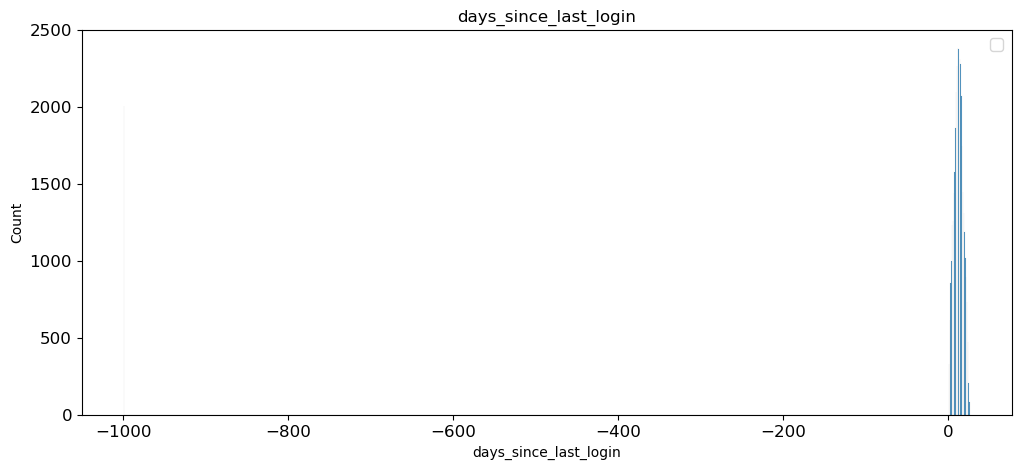

In [74]:
plt.figure(figsize=(12,5))


sns.histplot(df["days_since_last_login"])
plt.title("days_since_last_login")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [75]:
print("Nilai maksimum dari days_since_last_login adalah : ",df["days_since_last_login"].max())
print("Nilai minimum dari days_since_last_login adalah : ",df["days_since_last_login"].min())
print("Nilai rata-rata dari days_since_last_login adalah : ",df["days_since_last_login"].mean())

Nilai maksimum dari days_since_last_login adalah :  26
Nilai minimum dari days_since_last_login adalah :  -999
Nilai rata-rata dari days_since_last_login adalah :  -41.94350175628209


Text(0.5, 1.0, 'days_since_last_login customer yang beresiko churn')

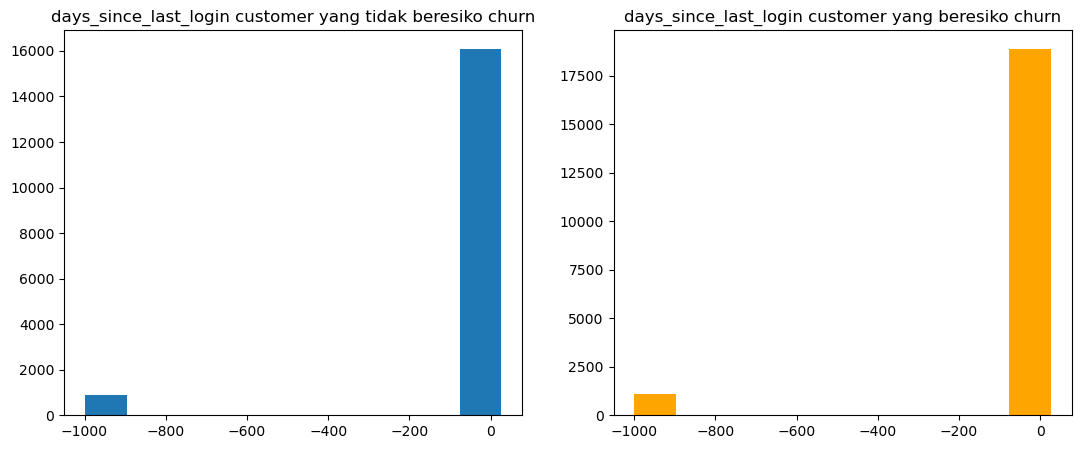

In [76]:
no_churn = df[df["churn_risk_score"] == 0]["days_since_last_login"].reset_index()
churn = df[df["churn_risk_score"] == 1]["days_since_last_login"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
axes[0].hist(no_churn["days_since_last_login"])
axes[0].set_title("days_since_last_login customer yang tidak beresiko churn")
axes[1].hist(churn["days_since_last_login"], color='orange')
axes[1].set_title("days_since_last_login customer yang beresiko churn")

In [77]:
churn.describe()

,index,days_since_last_login
count,20018.000000,20018.000000
mean,18522.905935,-43.211809
std,10660.682591,231.537678
min,0.000000,-999.000000
25%,9387.250000,8.000000
50%,18589.000000,12.000000
75%,27732.750000,16.000000
max,37009.000000,26.000000


In [78]:
no_churn.describe()

,index,days_since_last_login
count,16992.000000,16992.000000
mean,18482.816266,-40.449329
std,10711.702041,225.696214
min,2.000000,-999.000000
25%,9122.750000,8.000000
50%,18419.000000,12.000000
75%,27781.500000,16.000000
max,37008.000000,26.000000


Dalam eksplorasi column days_since_last_login didapatkan nilai yang cukup aneh. Karena nilai minimum pada column days_since_last_login adalah -999, Sedangkan menurut personal judgement yang saya miliki days_since_last_login tidaklah mungkin minus. Oleh karena itu data yang bernilai kurang dari 0 pada column days_since_last_login akan dianggap data salah input dan akan di trimmed pada saat feature engineering.

### 4.3.2 `avg_time_spent`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


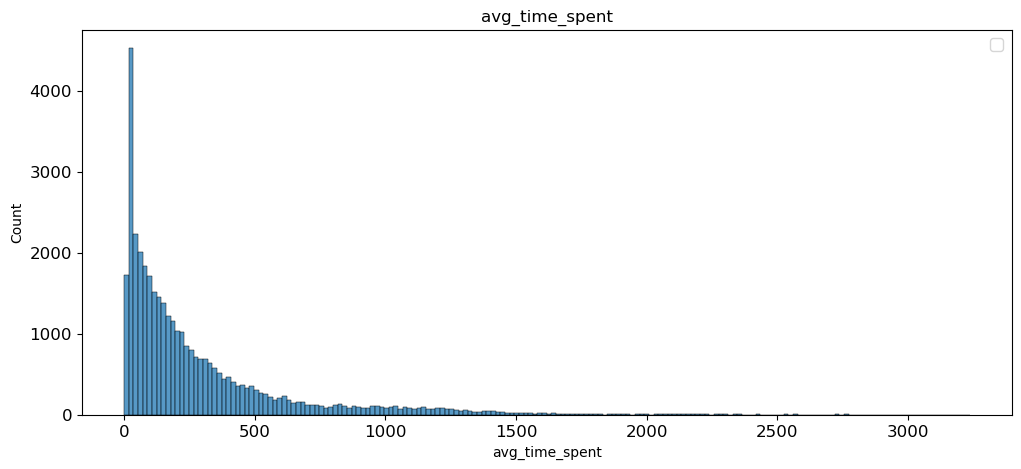

In [79]:
plt.figure(figsize=(12,5))


sns.histplot(df["avg_time_spent"])
plt.title("avg_time_spent")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [80]:
print("Nilai maksimum dari avg_time_spent adalah : ",df["avg_time_spent"].max())
print("Nilai minimum dari avg_time_spent adalah : ",df["avg_time_spent"].min())
print("Nilai rata-rata dari avg_time_spent adalah : ",df["avg_time_spent"].mean())

Nilai maksimum dari avg_time_spent adalah :  3235.5785210942604
Nilai minimum dari avg_time_spent adalah :  0.0
Nilai rata-rata dari avg_time_spent adalah :  279.201356112523


Text(0.5, 1.0, 'avg_time_spent customer yang beresiko churn')

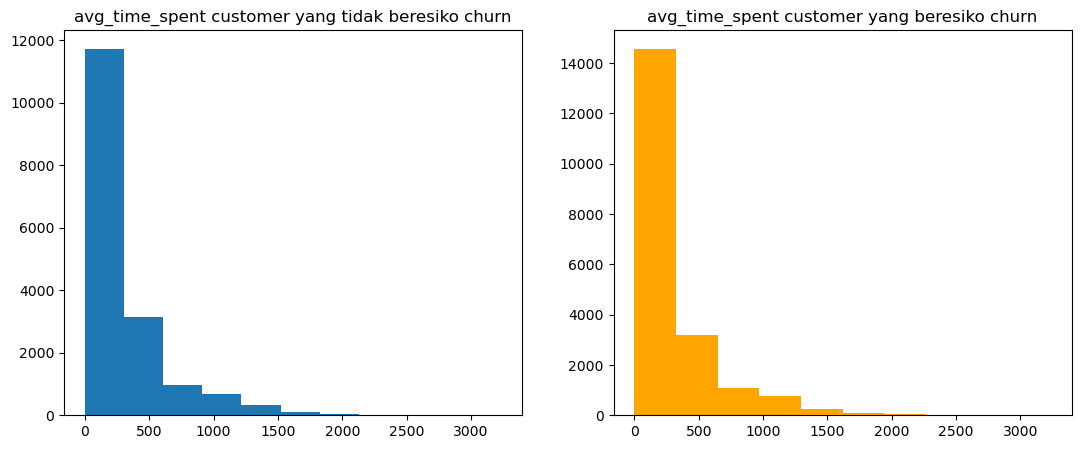

In [81]:
no_churn = df[df["churn_risk_score"] == 0]["avg_time_spent"].reset_index()
churn = df[df["churn_risk_score"] == 1]["avg_time_spent"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
axes[0].hist(no_churn["avg_time_spent"])
axes[0].set_title("avg_time_spent customer yang tidak beresiko churn")
axes[1].hist(churn["avg_time_spent"], color='orange')
axes[1].set_title("avg_time_spent customer yang beresiko churn")

In [82]:
churn.describe()

,index,avg_time_spent
count,20018.000000,20018.000000
mean,18522.905935,275.128299
std,10660.682591,329.072506
min,0.000000,0.000000
25%,9387.250000,58.152500
50%,18589.000000,156.860000
75%,27732.750000,346.537500
max,37009.000000,3235.578521


In [83]:
no_churn.describe()

,index,avg_time_spent
count,16992.000000,16992.000000
mean,18482.816266,283.999758
std,10711.702041,331.072368
min,2.000000,0.000000
25%,9122.750000,62.540000
50%,18419.000000,169.330000
75%,27781.500000,367.395000
max,37008.000000,3040.410000


Dari data dan plot diatas didapatkan bahwa rata-rata column avg_time_spent yang beresiko churn itu lebih rendah dari rata-rata column avg_time_spent yang tidak beresiko churn.

### 4.3.3 `avg_transaction_value`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


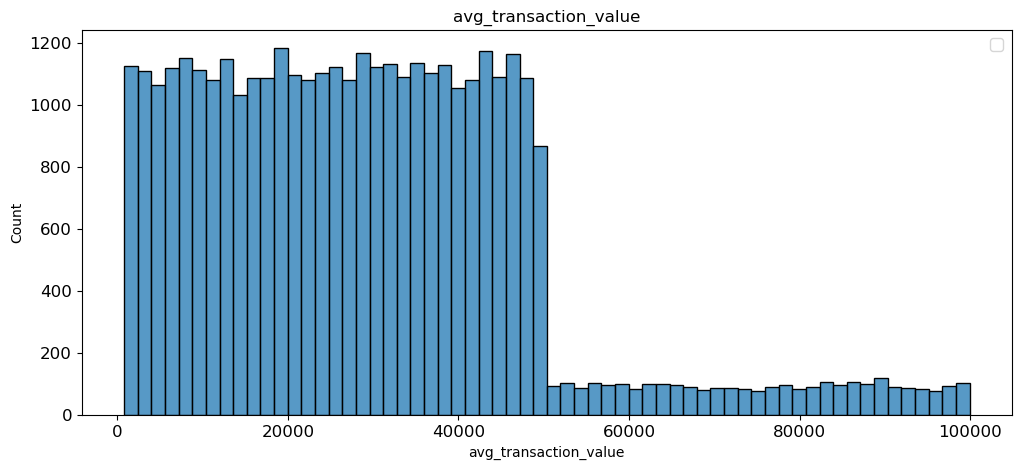

In [84]:
plt.figure(figsize=(12,5))


sns.histplot(df["avg_transaction_value"])
plt.title("avg_transaction_value")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [85]:
print("Nilai maksimum dari avg_transaction_value adalah : ",df["avg_transaction_value"].max())
print("Nilai minimum dari avg_transaction_value adalah : ",df["avg_transaction_value"].min())
print("Nilai rata-rata dari avg_transaction_value adalah : ",df["avg_transaction_value"].mean())

Nilai maksimum dari avg_transaction_value adalah :  99914.05
Nilai minimum dari avg_transaction_value adalah :  800.46
Nilai rata-rata dari avg_transaction_value adalah :  29272.430216427798


Text(0.5, 1.0, 'avg_transaction_value customer yang beresiko churn')

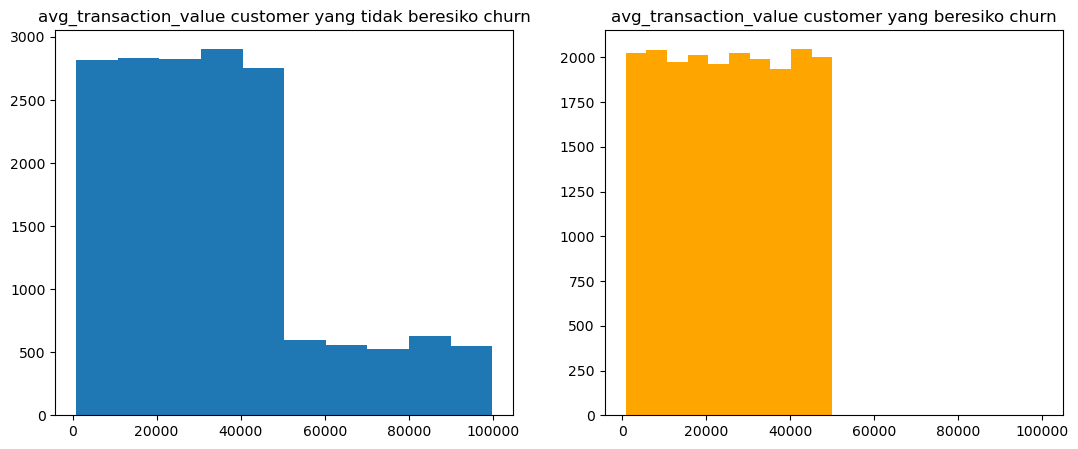

In [86]:
no_churn = df[df["churn_risk_score"] == 0]["avg_transaction_value"].reset_index()
churn = df[df["churn_risk_score"] == 1]["avg_transaction_value"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
axes[0].hist(no_churn["avg_transaction_value"])
axes[0].set_title("avg_transaction_value customer yang tidak beresiko churn")
axes[1].hist(churn["avg_transaction_value"], color='orange')
axes[1].set_title("avg_transaction_value customer yang beresiko churn")

In [87]:
churn.describe()

,index,avg_transaction_value
count,20018.000000,20018.000000
mean,18522.905935,25368.473030
std,10660.682591,14253.337378
min,0.000000,800.460000
25%,9387.250000,12933.600000
50%,18589.000000,25386.945000
75%,27732.750000,37777.072500
max,37009.000000,49997.690000


In [88]:
no_churn.describe()

,index,avg_transaction_value
count,16992.000000,16992.000000
mean,18482.816266,33871.618950
std,10711.702041,23349.734185
min,2.000000,806.220000
25%,9122.750000,15855.672500
50%,18419.000000,30597.400000
75%,27781.500000,45153.675000
max,37008.000000,99914.050000


Dari data dan plot diatas didapatkan bahwa nilai rata-rata column avg_transaction_value yang beresiko churn itu lebih rendah dari nilai rata-rata column avg_transaction_value yang tidak beresiko churn.

### 4.3.4 `avg_frequency_login_days`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


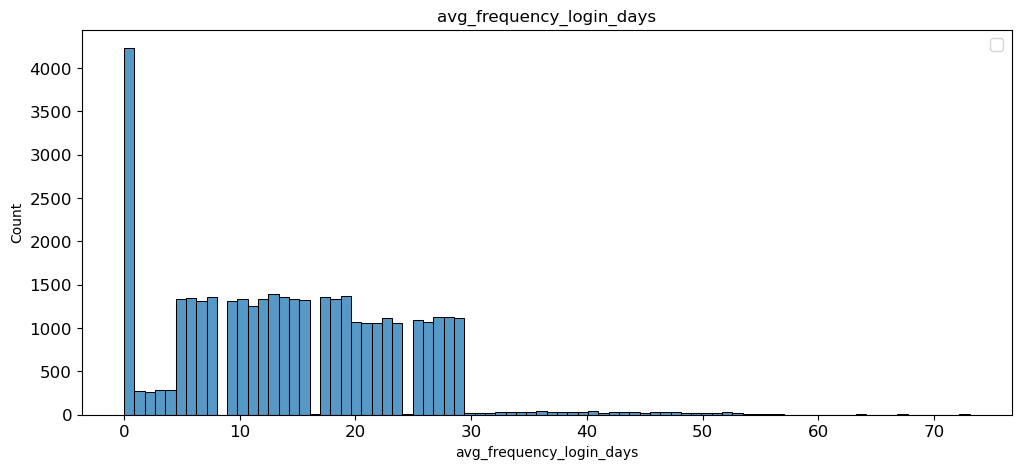

In [89]:
plt.figure(figsize=(12,5))


sns.histplot(df["avg_frequency_login_days"])
plt.title("avg_frequency_login_days")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [90]:
print("Nilai maksimum dari avg_frequency_login_days adalah : ",df["avg_frequency_login_days"].max())
print("Nilai minimum dari avg_frequency_login_days adalah : ",df["avg_frequency_login_days"].min())
print("Nilai rata-rata dari avg_frequency_login_days adalah : ",df["avg_frequency_login_days"].mean())

Nilai maksimum dari avg_frequency_login_days adalah :  73.06199459430009
Nilai minimum dari avg_frequency_login_days adalah :  0.0
Nilai rata-rata dari avg_frequency_login_days adalah :  14.659539531414552


Text(0.5, 1.0, 'avg_frequency_login_days customer yang beresiko churn')

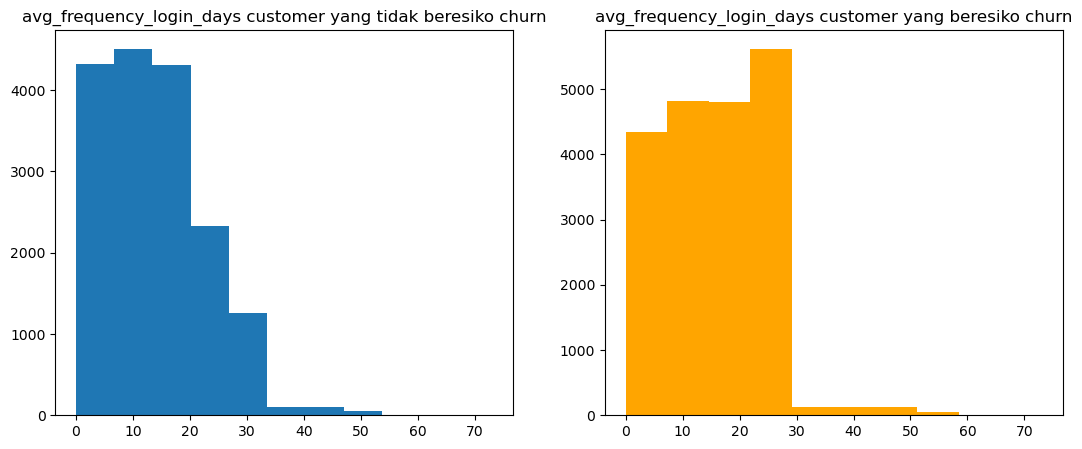

In [91]:
no_churn = df[df["churn_risk_score"] == 0]["avg_frequency_login_days"].reset_index()
churn = df[df["churn_risk_score"] == 1]["avg_frequency_login_days"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
axes[0].hist(no_churn["avg_frequency_login_days"])
axes[0].set_title("avg_frequency_login_days customer yang tidak beresiko churn")
axes[1].hist(churn["avg_frequency_login_days"], color='orange')
axes[1].set_title("avg_frequency_login_days customer yang beresiko churn")

In [92]:
churn.describe()

,index,avg_frequency_login_days
count,20018.000000,20018.000000
mean,18522.905935,15.650165
std,10660.682591,9.554652
min,0.000000,0.000000
25%,9387.250000,8.000000
50%,18589.000000,16.000000
75%,27732.750000,23.000000
max,37009.000000,73.061995


In [93]:
no_churn.describe()

,index,avg_frequency_login_days
count,16992.000000,16992.000000
mean,18482.816266,13.492500
std,10711.702041,9.253758
min,2.000000,0.000000
25%,9122.750000,6.000000
50%,18419.000000,13.000000
75%,27781.500000,20.000000
max,37008.000000,67.062422


Dari data dan plot diatas didapatkan bahwa nilai rata-rata column avg_frequency_login_days yang beresiko churn itu lebih tinggi dari nilai rata-rata column avg_frequency_login_days yang tidak beresiko churn.

### 4.3.5 `points_in_wallet`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


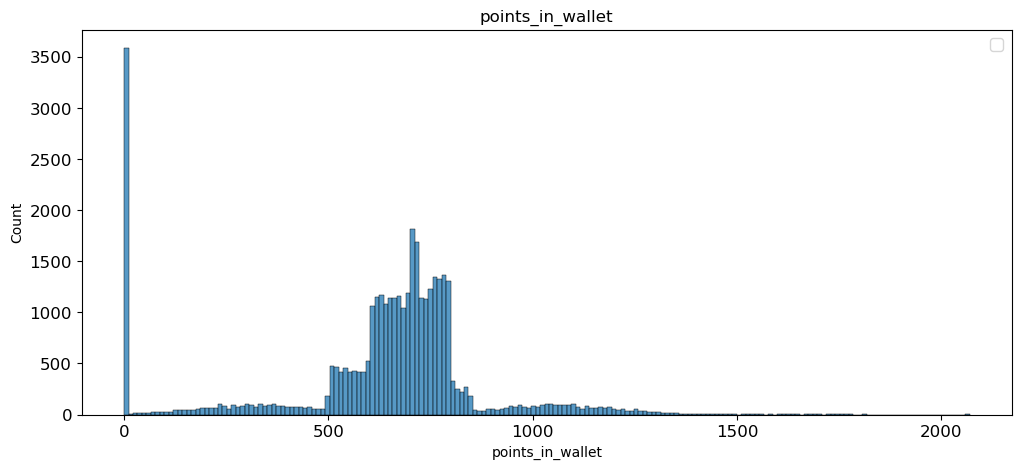

In [94]:
plt.figure(figsize=(12,5))


sns.histplot(df["points_in_wallet"])
plt.title("points_in_wallet")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [95]:
print("Nilai maksimum dari points_in_wallet adalah : ",df["points_in_wallet"].max())
print("Nilai minimum dari points_in_wallet adalah : ",df["points_in_wallet"].min())
print("Nilai rata-rata dari points_in_wallet adalah : ",df["points_in_wallet"].mean())

Nilai maksimum dari points_in_wallet adalah :  2069.069760814851
Nilai minimum dari points_in_wallet adalah :  0.0
Nilai rata-rata dari points_in_wallet adalah :  623.5908849241127


Text(0.5, 1.0, 'points_in_wallet customer yang beresiko churn')

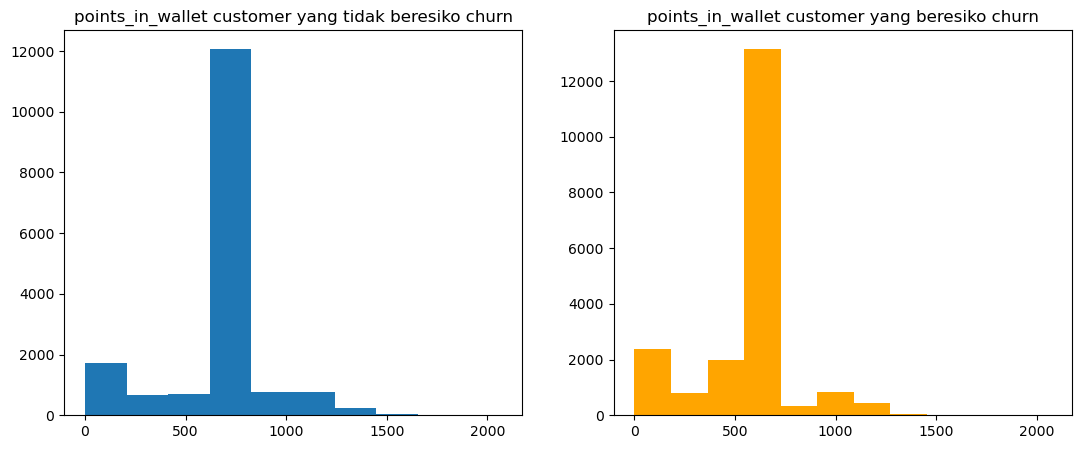

In [96]:
no_churn = df[df["churn_risk_score"] == 0]["points_in_wallet"].reset_index()
churn = df[df["churn_risk_score"] == 1]["points_in_wallet"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
axes[0].hist(no_churn["points_in_wallet"])
axes[0].set_title("points_in_wallet customer yang tidak beresiko churn")
axes[1].hist(churn["points_in_wallet"], color='orange')
axes[1].set_title("points_in_wallet customer yang beresiko churn")

In [97]:
churn.describe()

,index,points_in_wallet
count,20018.000000,20018.000000
mean,18522.905935,573.729076
std,10660.682591,255.006745
min,0.000000,0.000000
25%,9387.250000,541.122500
50%,18589.000000,628.575000
75%,27732.750000,678.827500
max,37009.000000,1816.933696


In [98]:
no_churn.describe()

,index,points_in_wallet
count,16992.000000,16992.000000
mean,18482.816266,682.332274
std,10711.702041,275.781604
min,2.000000,0.000000
25%,9122.750000,708.295000
50%,18419.000000,749.400000
75%,27781.500000,784.212500
max,37008.000000,2069.069761


Dari data dan plot diatas didapatkan bahwa customer yang beresiko churn itu memiliki nilai points_in_wallet yang lebih rendah dari customer yang tidak beresiko untuk churn.

# 5 - Feature Engineering

## 5.1 - Columns Selection

Pembagian kolom Numerical dan Categorical

In [99]:
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,umur,year_month
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,5,2017-04
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,9,2017-03
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0,5,2017-02
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1,12,2015-12
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0,12,2015-03


Berdasarkan hasil dari Analisis yang dilakukan, kolom yang akan digunakan untuk membuat model, yaitu:

- Data Target : `churn_risk_score`
- Data Numeric : `'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet'`
- Data Categorical Nominal : `membership_category`

In [100]:
target = ['churn_risk_score'] # target
num_cols = ['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet'] # Numeric
catn_cols = ['membership_category', 'feedback']

Kolom yang tidak akan digunakan adalah :

- `user_id` : Alasannya karena data pada kolom ini tidak mempresentasikan nilai kolom numerical ataupun kategorikal.
- `age` : Alasannya karena kolom ini sudah diganti dengan kolom `umur` atau kolom range umur setiap 5 tahun 1-5, 6-10, dll.
- `joining_date` : Alasannya karena kolom ini sudah diganti dengan kolom `year_month`.
- `last_visit_time` : Alasannya karena menurut personal judgement yang saya miliki nilai yang ada pada data ini sudah terwakilkan dengan adanya kolom `days_since_last_login`
- `'gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'umur', 'year_month'` : Alasannya karena pada kolom-kolom ini data yang ada itu terlalu balance, oleh karena itu jika kolom ini dimasukkan kedalam model maka pengaruh atau impact yang diberikan pada model sangatlah kecil. Bahkan jika kita memasukkan kolom ini kedalam model hanya akan membuat model menjadi semakin berat tanpa menambah informasi.

Membuat dataframe yang hanya berisi kolom yang ingin digunakan

In [101]:
df2 = df[catn_cols + num_cols + target]
df2 # Datframe yang hanya berisi kolom yang akan digunakan

,membership_category,feedback,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
0,No Membership,Poor Website,4,1184.490000,38604.69,10.0,627.48,1
1,Basic Membership,Poor Customer Service,11,338.150000,7665.66,17.0,575.97,1
2,Silver Membership,Too many ads,8,235.140000,37671.69,5.0,767.93,0
3,No Membership,Too many ads,10,56.670000,15678.14,11.0,590.22,1
4,Silver Membership,Poor Product Quality,9,153.990000,8422.68,0.0,722.04,0
...,...,...,...,...,...,...,...,...
37005,Gold Membership,User Friendly Website,15,199.330000,29455.29,9.0,846.52,0
37006,Gold Membership,Reasonable Price,15,368.500000,27038.47,8.0,835.98,0
37007,Gold Membership,Poor Customer Service,13,272.130000,39305.35,27.0,714.90,0
37008,Gold Membership,Poor Website,-999,65.070000,46108.73,6.0,744.99,0


Perbandingan Dataframe yang belum dipilih kolomnya dan Dataframe yang sudah dipilih kolomnya

In [102]:
print("Shape sebelum Columns Selection : ", df.shape)
print("Shape setelah Columns Selection : ", df2.shape)

Shape sebelum Columns Selection :  (37010, 24)
Shape setelah Columns Selection :  (37010, 8)


Setelah di Column Selection feature dilakukan, didapatkan bahwa jumlah kolom yang dibutuhkan dari data berkurang 4 buah kolom dari nilai awal

## 5.2 - Splitting Between X and y

Split kolom feature dan target

In [103]:
X = df2.drop('churn_risk_score', axis=1)
y = df2["churn_risk_score"]

Setelah di split kolom feature dan targetnya, Split data menjadi data set train, val dan test.

In [104]:
# Split Between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size = 0.15, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size = 0.15, random_state=28)

print("Train Size : ", X_train.shape)
print("Val Size : ", X_val.shape)
print("Test Size : ", X_test.shape)

Train Size :  (26739, 7)
Val Size :  (4719, 7)
Test Size :  (5552, 7)


## 5.3 - Handling Outlier

Cari outlier data didalam kolom numerical. Jika data skew maka pencarian outlier menggunakan tukey rule namun jika distribusi data normal maka pencarian outlier menggunakan std

In [105]:
normal = []
skew = []

def cari_outlier(df, arg1):
    a = df[arg1].skew()
    if a > 0.5 or a < -0.5:
        IQR = df[arg1].quantile(0.75) - df[arg1].quantile(0.25)
        skew.append((arg1, a))
        print("---------------------------------------------------------------------------")
        print(f"DATA {arg1} SKEW : {a}")
        print("")
        print(f"Maximum {arg1} : ",df[arg1].max())
        print(f"Upper Boundary {arg1} : ", df[arg1].quantile(0.75) + (IQR * 3))
        print("")
        print(f"Minimum {arg1} : ",df[arg1].min())
        print(f"Lower Boundary {arg1} : ", df[arg1].quantile(0.75) - (IQR * 3))
        print("")
        print(f"Average {arg1} : ",df[arg1].max())
        print("---------------------------------------------------------------------------")
        print("")
    else:
        normal.append((arg1, a))
        print("---------------------------------------------------------------------------")
        print(f"DATA {arg1} NORMAL : {a}")
        print("")
        print(f"Maximum {arg1} : ",df[arg1].max())
        print(f"Upper Boundary {arg1} : ", df[arg1].mean() + 3 * df[arg1].std())
        print("")
        print(f"Minimum {arg1} : ",df[arg1].min())
        print(f"Lower Boundary {arg1} : ", df[arg1].mean() - 3 * df[arg1].std())
        print("")
        print(f"Average {arg1} : ",df[arg1].max())
        print("---------------------------------------------------------------------------")
        print("")

for x in X_train[num_cols]:
    cari_outlier(X_train,x)

---------------------------------------------------------------------------
DATA days_since_last_login SKEW : -3.992103743141792

Maximum days_since_last_login :  26
Upper Boundary days_since_last_login :  40.0

Minimum days_since_last_login :  -999
Lower Boundary days_since_last_login :  -8.0

Average days_since_last_login :  26
---------------------------------------------------------------------------

---------------------------------------------------------------------------
DATA avg_time_spent SKEW : 2.239843309194943

Maximum avg_time_spent :  3040.41
Upper Boundary avg_time_spent :  1246.23

Minimum avg_time_spent :  0.0
Lower Boundary avg_time_spent :  -532.3499999999999

Average avg_time_spent :  3040.41
---------------------------------------------------------------------------

---------------------------------------------------------------------------
DATA avg_transaction_value SKEW : 1.015121597202246

Maximum avg_transaction_value :  99914.05
Upper Boundary avg_transacti

Dari hasil EDA pada poin 4.3.1 bahwa ada kejanggalan data yang bisa di trim.

In [106]:
X_train = X_train.drop(X_train[X_train['days_since_last_login'] < 0].index)
y_train = y_train.loc[X_train.index]

## 5.4 - Check Cardinality

Check cardinality data dengan cara cek apakah jumlah unique value yang ada pada kolom banyak atau tidak.

In [107]:
for x in catn_cols:
    print(f"Jumlah variable dalam kolom {x} :", len(X_train[x].unique()))

Jumlah variable dalam kolom membership_category : 6
Jumlah variable dalam kolom feedback : 9


Setelah di cek didapatkan bahwa jumlah unique variable dalam suatu kolom masih kecil.

## 5.5 - Handling Missing Values

Cek missing values yang ada pada data set

In [108]:
X_train.isnull().sum()

membership_category         0
feedback                    0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
dtype: int64

In [109]:
X_val.isnull().sum()

membership_category         0
feedback                    0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
dtype: int64

In [110]:
X_test.isnull().sum()

membership_category         0
feedback                    0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
dtype: int64

In [111]:
y_train.isnull().sum()

0

In [112]:
y_val.isnull().sum()

0

In [113]:
y_test.isnull().sum()

0

Setelah dilakukan pengecekan nilai missing values, didapatkan bahwa tidak ada data yang missing.

## 5.6 - Pipeline

Buat pipeline untuk scaling dan encoding

Liat bentuk distribusi data

In [114]:
skew = []

def cari_outlier(df, arg1):
    a = df[arg1].skew()
    skew.append((arg1, a))

for x in X_train[num_cols]:
    cari_outlier(X_train,x)

print(skew)

[('days_since_last_login', 0.03318764343196572), ('avg_time_spent', 2.2341511794104525), ('avg_transaction_value', 1.0114050225842044), ('avg_frequency_login_days', 0.3789694140313791), ('points_in_wallet', -0.7782493694233178)]


Karena distribusi data cukup normal, maka saya menggunakan Standard scaler.

In [115]:
num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_cols),
    ('pipe_cat', cat_pipeline, catn_cols)
])

Setelah di buat pipelinenya bisa langsung di fit dan transform

In [116]:
# Fit and Transform

X_train_pipe = final_pipeline.fit_transform(X_train)
X_val_pipe = final_pipeline.transform(X_val)
X_test_pipe = final_pipeline.transform(X_test)

## 5.7 - Tensorflow Pipeline

Buat pipeline TensorFLow menggunakan batch_size = 128 dan shuffle sebanyak row data serta repeat sebanyak 2 kali

In [203]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_pipe,y_train)).batch(128).repeat(2).shuffle(len(y_train)).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test_pipe,y_test)).batch(128)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_pipe,y_val)).batch(128)

# 6 - Sequential API

## 6.1 - First Model

### 6.1.1 - Model Definition

In [204]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [205]:
model_sequential_1 = Sequential()
model_sequential_1.add(Dense(16, activation='relu', input_shape=(20,))) # hidden Layer 1 [16 itu jumlah hidden layer, activation='relu' itu activation,input_shape=(20,) itu jumlah fitur ]
model_sequential_1.add(Dense(8, activation='relu')) # hidden layer 2
model_sequential_1.add(Dense(1, activation='sigmoid')) # ini output layer


# Compile
model_sequential_1.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['Precision', 'accuracy'])

model_sequential_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


### 6.1.2 - Model Training

In [206]:
%%time
# Train the Model
history_seq_1 = model_sequential_1.fit(train_pipe, epochs=60, validation_data=val_pipe)

Epoch 1/60
396/396 [==============================] - 1s 974us/step - loss: 0.4130 - precision: 0.7999 - accuracy: 0.8006 - val_loss: 1.5414 - val_precision: 0.8404 - val_accuracy: 0.8523
Epoch 2/60
396/396 [==============================] - 0s 721us/step - loss: 0.2551 - precision: 0.8971 - accuracy: 0.8851 - val_loss: 1.3633 - val_precision: 0.8520 - val_accuracy: 0.8693
Epoch 3/60
396/396 [==============================] - 0s 746us/step - loss: 0.2407 - precision: 0.9057 - accuracy: 0.9027 - val_loss: 1.7750 - val_precision: 0.8668 - val_accuracy: 0.8803
Epoch 4/60
396/396 [==============================] - 0s 783us/step - loss: 0.2255 - precision: 0.9166 - accuracy: 0.9179 - val_loss: 1.5484 - val_precision: 0.8628 - val_accuracy: 0.8907
Epoch 5/60
396/396 [==============================] - 0s 767us/step - loss: 0.2086 - precision: 0.9239 - accuracy: 0.9251 - val_loss: 1.3848 - val_precision: 0.8835 - val_accuracy: 0.8940
Epoch 6/60
396/396 [==============================] - 0s 721

### 6.1.3 - Model Evaluation

In [207]:
history_seq_1_df = pd.DataFrame(history_seq_1.history)
history_seq_1_df

,loss,precision,accuracy,val_loss,val_precision,val_accuracy
0,0.413048,0.799937,0.800592,1.541373,0.840426,0.852299
1,0.255061,0.897067,0.885114,1.363330,0.852000,0.869252
2,0.240700,0.905682,0.902744,1.774977,0.866790,0.880271
3,0.225510,0.916595,0.917907,1.548370,0.862843,0.890655
4,0.208624,0.923899,0.925113,1.384821,0.883452,0.894045
5,0.193311,0.928842,0.928944,1.577967,0.882570,0.898072
6,0.183453,0.931435,0.929240,1.795959,0.879765,0.898072
7,0.178254,0.930748,0.929497,1.305694,0.878443,0.895741
8,0.175067,0.931093,0.930247,2.104040,0.886729,0.897436
9,0.172328,0.931696,0.931313,1.779320,0.888722,0.897224


<AxesSubplot:>

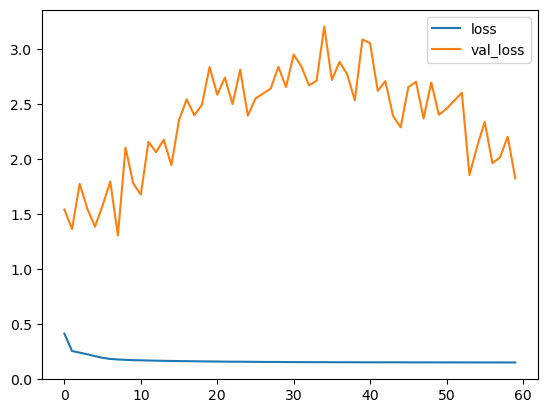

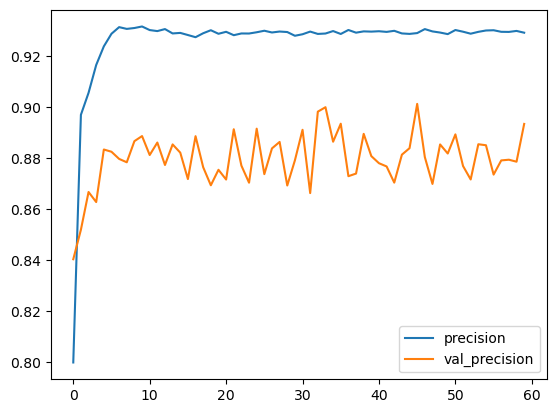

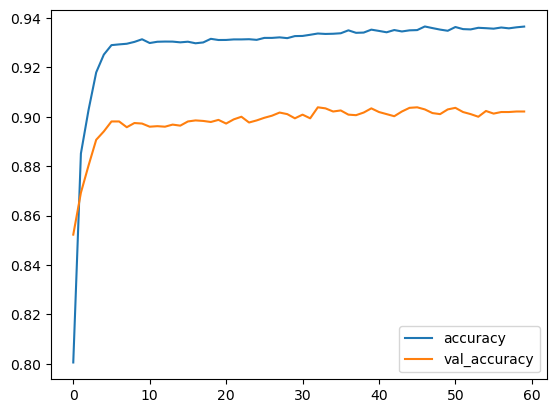

In [208]:
history_seq_1_df[['loss', 'val_loss']].plot()
history_seq_1_df[['precision', 'val_precision']].plot()
history_seq_1_df[['accuracy', 'val_accuracy']].plot()

In [209]:
y_pred_seq_val_1 = model_sequential_1.predict(val_pipe)
y_pred_seq_val_1 = np.where(y_pred_seq_val_1 >= 0.5,1,0)
y_pred_seq_test_1 = model_sequential_1.predict(test_pipe)
y_pred_seq_test_1 = np.where(y_pred_seq_test_1 >= 0.5,1,0)

print('accuracy score val set : ', accuracy_score(y_val, y_pred_seq_val_1))
print('accuracy score test set : ', accuracy_score(y_test, y_pred_seq_test_1))
print("")
print('precision score val set : ', precision_score(y_val, y_pred_seq_val_1))
print('precision score test set : ', precision_score(y_test, y_pred_seq_test_1))
print("")
print(classification_report(y_test, y_pred_seq_test_1))

44/44 [==============================] - 0s 556us/step
accuracy score val set :  0.9020979020979021
accuracy score test set :  0.909221902017291

precision score val set :  0.8934888972525404
precision score test set :  0.9035910708508573

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2553
           1       0.90      0.93      0.92      2999

    accuracy                           0.91      5552
   macro avg       0.91      0.91      0.91      5552
weighted avg       0.91      0.91      0.91      5552



Dari data diatas dapat disimpulkan bahwa model pertama Sequential API merupakan model yang kurang baik. Meskipun memiliki nilai accuracy dan precision yang cukup tinggi pada dataset val dan test, Akan tetapi model ini memiliki kelemahan yang sangat fatal yaitu memiliki nilai val_loss yang sangat tinggi.

## 6.2 - Improve Model

### 6.2.1 - Model Definition

In [259]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [260]:
model_sequential_2 = Sequential()
model_sequential_2.add(Dense(16, activation='sigmoid', input_shape=(20,))) # hidden Layer 1 [16 itu jumlah hidden layer, activation='sigmoid' itu activation,input_shape=(20,) itu jumlah fitur ]
model_sequential_2.add(Dense(32, activation='sigmoid')) # hidden layer 2
model_sequential_2.add(Dense(1, activation='sigmoid')) # ini output layer


# Compile
model_sequential_2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['Precision', 'accuracy'])

model_sequential_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


### 6.2.2 - Model Training

In [261]:
%%time
# Train the Model
history_seq_2 = model_sequential_2.fit(train_pipe, epochs=60, validation_data=val_pipe)

Epoch 1/60
396/396 [==============================] - 1s 1ms/step - loss: 0.6061 - precision: 0.6653 - accuracy: 0.6861 - val_loss: 0.4549 - val_precision: 0.7981 - val_accuracy: 0.8089
Epoch 2/60
396/396 [==============================] - 0s 805us/step - loss: 0.3173 - precision: 0.9080 - accuracy: 0.8539 - val_loss: 0.3178 - val_precision: 0.8660 - val_accuracy: 0.8317
Epoch 3/60
396/396 [==============================] - 0s 832us/step - loss: 0.2585 - precision: 0.9197 - accuracy: 0.8601 - val_loss: 0.3128 - val_precision: 0.8712 - val_accuracy: 0.8277
Epoch 4/60
396/396 [==============================] - 0s 799us/step - loss: 0.2533 - precision: 0.9211 - accuracy: 0.8604 - val_loss: 0.2930 - val_precision: 0.8680 - val_accuracy: 0.8264
Epoch 5/60
396/396 [==============================] - 0s 791us/step - loss: 0.2517 - precision: 0.9170 - accuracy: 0.8631 - val_loss: 0.2979 - val_precision: 0.8490 - val_accuracy: 0.8498
Epoch 6/60
396/396 [==============================] - 0s 887us

### 6.2.3 - Model Evaluation

In [262]:
history_seq_2_df = pd.DataFrame(history_seq_2.history)
history_seq_2_df

,loss,precision,accuracy,val_loss,val_precision,val_accuracy
0,0.606067,0.665271,0.686081,0.454919,0.798122,0.808858
1,0.317318,0.908023,0.853919,0.317790,0.866001,0.831744
2,0.258470,0.919698,0.860099,0.312751,0.871160,0.827718
3,0.253304,0.921137,0.860355,0.292997,0.867997,0.826446
4,0.251667,0.916966,0.863060,0.297950,0.848978,0.849756
5,0.250912,0.913377,0.864896,0.298814,0.869639,0.827930
6,0.250264,0.915917,0.867384,0.293354,0.855818,0.849121
7,0.249862,0.913111,0.867720,0.286540,0.872796,0.835346
8,0.249042,0.912226,0.870721,0.283121,0.861828,0.875185
9,0.248132,0.915078,0.875281,0.286694,0.856579,0.880483


<AxesSubplot:>

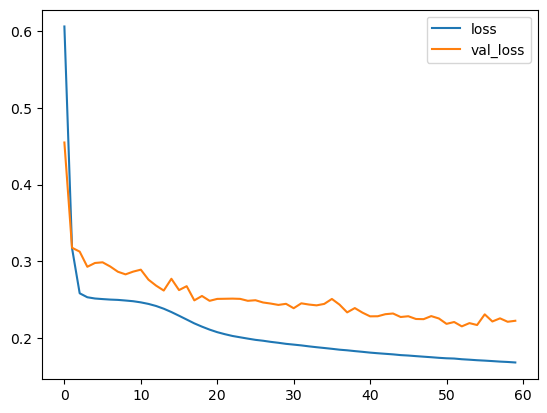

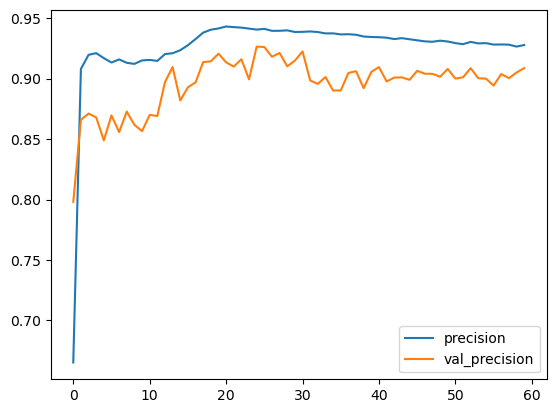

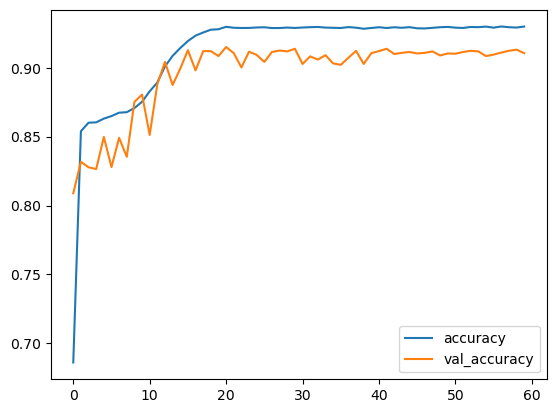

In [263]:
history_seq_2_df[['loss', 'val_loss']].plot()
history_seq_2_df[['precision', 'val_precision']].plot()
history_seq_2_df[['accuracy', 'val_accuracy']].plot()

In [264]:
y_pred_seq_val_2 = model_sequential_2.predict(val_pipe)
y_pred_seq_val_2 = np.where(y_pred_seq_val_2 >= 0.5,1,0)
y_pred_seq_test_2 = model_sequential_2.predict(test_pipe)
y_pred_seq_test_2 = np.where(y_pred_seq_test_2 >= 0.5,1,0)

print('accuracy score val set : ', accuracy_score(y_val, y_pred_seq_val_2))
print('accuracy score test set : ', accuracy_score(y_test, y_pred_seq_test_2))
print("")
print('precision score val set : ', precision_score(y_val, y_pred_seq_val_2))
print('precision score test set : ', precision_score(y_test, y_pred_seq_test_2))
print("")
print(classification_report(y_test, y_pred_seq_test_2))

44/44 [==============================] - 0s 469us/step
accuracy score val set :  0.9105742742106379
accuracy score test set :  0.9176873198847262

precision score val set :  0.9087073264288454
precision score test set :  0.9214190981432361

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2553
           1       0.92      0.93      0.92      2999

    accuracy                           0.92      5552
   macro avg       0.92      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552



Setelah di improve dengan cara mengganti nilai neuron dan jenis activation yang ada pada model. Kita berhasil mendapatkan model yang lebih baik. Hal ini dapat dilihat dari nilai val_lossnya jauh lebih stabil jika dibandingkan dengan model sequential yang pertama

# 7 - Functional API

## 7.1 - First Model

### 7.1.1 - Model Definition

In [216]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [217]:
input_layer = Input(shape=(20,))
hidden_layer_1 = Dense(16, activation='relu')(input_layer)
hidden_layer_2 = Dense(8, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional_1 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_1.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['Precision', 'accuracy'])
model_functional_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           336         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 28)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

### 7.1.2 - Model Training

In [218]:
%%time
# Train the Model
history_func_1 = model_functional_1.fit(train_pipe, epochs=60, validation_data=val_pipe)

Epoch 1/60
396/396 [==============================] - 1s 982us/step - loss: 0.3937 - precision: 0.8164 - accuracy: 0.8027 - val_loss: 0.4223 - val_precision: 0.8343 - val_accuracy: 0.8447
Epoch 2/60
396/396 [==============================] - 0s 782us/step - loss: 0.2527 - precision: 0.8884 - accuracy: 0.8743 - val_loss: 0.3100 - val_precision: 0.8660 - val_accuracy: 0.8631
Epoch 3/60
396/396 [==============================] - 0s 755us/step - loss: 0.2472 - precision: 0.8921 - accuracy: 0.8862 - val_loss: 0.5383 - val_precision: 0.8291 - val_accuracy: 0.8591
Epoch 4/60
396/396 [==============================] - 0s 740us/step - loss: 0.2442 - precision: 0.8976 - accuracy: 0.8953 - val_loss: 0.4231 - val_precision: 0.8625 - val_accuracy: 0.8737
Epoch 5/60
396/396 [==============================] - 0s 745us/step - loss: 0.2416 - precision: 0.9021 - accuracy: 0.9027 - val_loss: 0.7223 - val_precision: 0.8552 - val_accuracy: 0.8748
Epoch 6/60
396/396 [==============================] - 0s 745

### 7.1.3 - Model Evaluation

In [219]:
history_func_1_df = pd.DataFrame(history_func_1.history)
history_func_1_df

,loss,precision,accuracy,val_loss,val_precision,val_accuracy
0,0.393664,0.816441,0.802744,0.422317,0.834313,0.844670
1,0.252667,0.888420,0.874294,0.309963,0.866027,0.863107
2,0.247219,0.892099,0.886160,0.538293,0.829149,0.859080
3,0.244229,0.897615,0.895341,0.423115,0.862542,0.873702
4,0.241600,0.902124,0.902705,0.722286,0.855177,0.874762
5,0.239399,0.903093,0.904265,0.325275,0.880889,0.880483
6,0.236158,0.908629,0.910800,0.361847,0.868248,0.886629
7,0.230524,0.914639,0.917019,0.500193,0.878606,0.887264
8,0.222386,0.919874,0.921974,0.394262,0.883694,0.886840
9,0.209989,0.925349,0.925864,0.721125,0.896241,0.887900


<AxesSubplot:>

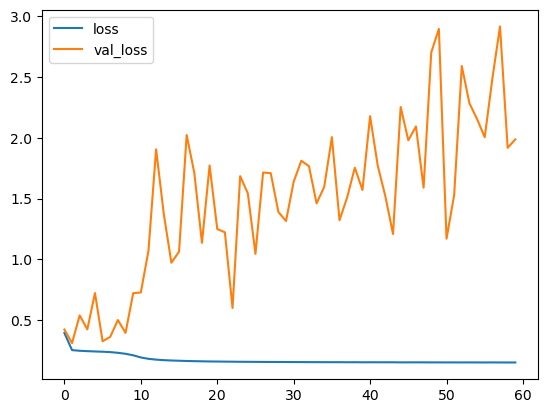

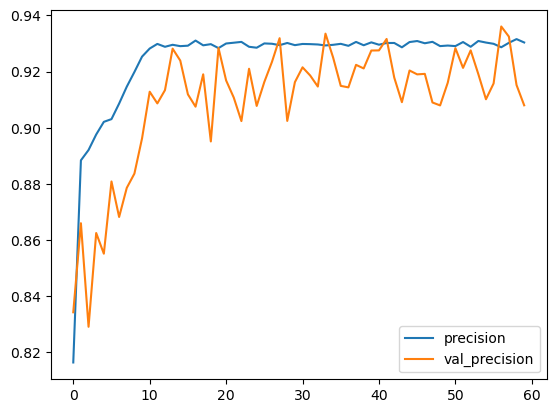

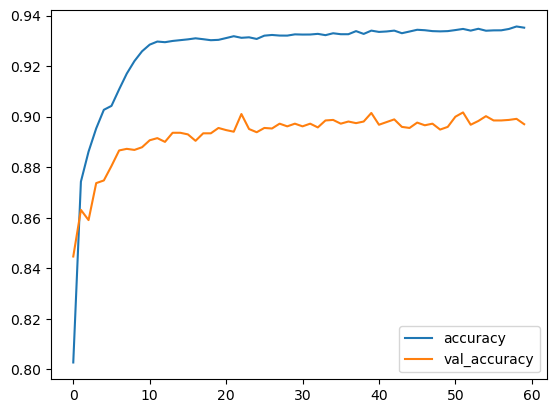

In [220]:
history_func_1_df[['loss', 'val_loss']].plot()
history_func_1_df[['precision', 'val_precision']].plot()
history_func_1_df[['accuracy', 'val_accuracy']].plot()

In [221]:
y_pred_func_val_1 = model_functional_1.predict(val_pipe)
y_pred_func_val_1 = np.where(y_pred_func_val_1 >= 0.5,1,0)
y_pred_func_test_1 = model_functional_1.predict(test_pipe)
y_pred_func_test_1 = np.where(y_pred_func_test_1 >= 0.5,1,0)

print('accuracy score val set : ', accuracy_score(y_val, y_pred_func_val_1))
print('accuracy score test set : ', accuracy_score(y_test, y_pred_func_test_1))
print("")
print('precision score val set : ', precision_score(y_val, y_pred_func_val_1))
print('precision score test set : ', precision_score(y_test, y_pred_func_test_1))
print("")
print(classification_report(y_test, y_pred_func_test_1))

44/44 [==============================] - 0s 484us/step
accuracy score val set :  0.8970120788302607
accuracy score test set :  0.9039985590778098

precision score val set :  0.9080142123963679
precision score test set :  0.9115487316421896

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2553
           1       0.91      0.91      0.91      2999

    accuracy                           0.90      5552
   macro avg       0.90      0.90      0.90      5552
weighted avg       0.90      0.90      0.90      5552



Dari data diatas dapat disimpulkan bahwa model pertama Functional API merupakan model yang kurang baik. Karena memiliki nilai val_loss yang sangatlah tidak stabil.

## 7.2 - Improve Model

### 7.2.1 - Model Definition

In [275]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [276]:
input_layer = Input(shape=(20,))
hidden_layer_1 = Dense(16, activation='sigmoid')(input_layer)
hidden_layer_2 = Dense(24, activation='sigmoid')(hidden_layer_1)

output_layer = Dense(1, activation='sigmoid')(hidden_layer_2)

model_functional_2 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['Precision', 'accuracy'])
model_functional_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


### 7.2.2 - Model Training

In [277]:
%%time
# Train the Model
history_func_2 = model_functional_2.fit(train_pipe, epochs=60, validation_data=val_pipe)

Epoch 1/60
396/396 [==============================] - 1s 1ms/step - loss: 0.5952 - precision: 0.6714 - accuracy: 0.6946 - val_loss: 0.4398 - val_precision: 0.8578 - val_accuracy: 0.8163
Epoch 2/60
396/396 [==============================] - 0s 819us/step - loss: 0.3033 - precision: 0.9165 - accuracy: 0.8584 - val_loss: 0.3470 - val_precision: 0.9051 - val_accuracy: 0.8300
Epoch 3/60
396/396 [==============================] - 0s 790us/step - loss: 0.2571 - precision: 0.9204 - accuracy: 0.8614 - val_loss: 0.3530 - val_precision: 0.9146 - val_accuracy: 0.8214
Epoch 4/60
396/396 [==============================] - 0s 797us/step - loss: 0.2527 - precision: 0.9180 - accuracy: 0.8639 - val_loss: 0.3609 - val_precision: 0.9031 - val_accuracy: 0.8326
Epoch 5/60
396/396 [==============================] - 0s 788us/step - loss: 0.2509 - precision: 0.9137 - accuracy: 0.8651 - val_loss: 0.3182 - val_precision: 0.9086 - val_accuracy: 0.8305
Epoch 6/60
396/396 [==============================] - 0s 779us

### 7.2.3 - Model Evaluation

In [278]:
history_func_2_df = pd.DataFrame(history_func_2.history)
history_func_2_df

,loss,precision,accuracy,val_loss,val_precision,val_accuracy
0,0.595238,0.671362,0.694551,0.439775,0.857810,0.816275
1,0.303288,0.916498,0.858381,0.347004,0.905137,0.830049
2,0.257093,0.920366,0.861382,0.352974,0.914646,0.821360
3,0.252700,0.918026,0.863870,0.360866,0.903064,0.832592
4,0.250942,0.913678,0.865094,0.318223,0.908625,0.830473
5,0.249906,0.911428,0.871550,0.361676,0.914646,0.821360
6,0.248283,0.914865,0.876150,0.369474,0.909436,0.824963
7,0.246262,0.918863,0.883731,0.346183,0.903659,0.879847
8,0.243544,0.919397,0.894886,0.357071,0.913644,0.865014
9,0.239935,0.920615,0.904936,0.279900,0.905859,0.884721


<AxesSubplot:>

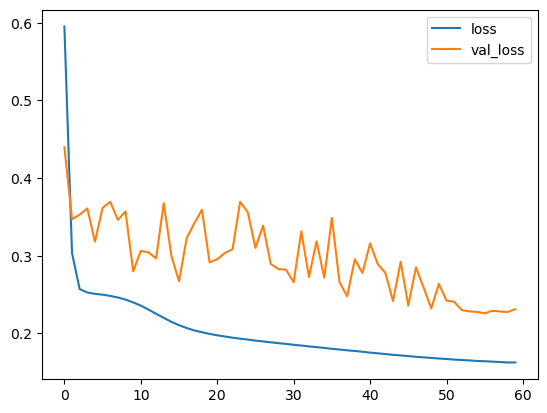

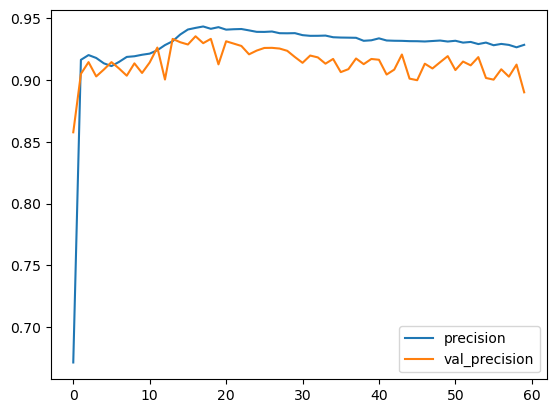

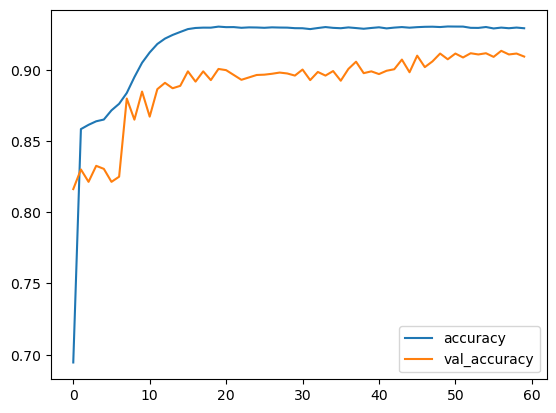

In [279]:
history_func_2_df[['loss', 'val_loss']].plot()
history_func_2_df[['precision', 'val_precision']].plot()
history_func_2_df[['accuracy', 'val_accuracy']].plot()

In [280]:
y_pred_func_val_2 = model_functional_2.predict(val_pipe)
y_pred_func_val_2 = np.where(y_pred_func_val_2 >= 0.5,1,0)
y_pred_func_test_2 = model_functional_2.predict(test_pipe)
y_pred_func_test_2 = np.where(y_pred_func_test_2 >= 0.5,1,0)

print('accuracy score val set : ', accuracy_score(y_val, y_pred_func_val_2))
print('accuracy score test set : ', accuracy_score(y_test, y_pred_func_test_2))
print("")
print('precision score val set : ', precision_score(y_val, y_pred_func_val_2))
print('precision score test set : ', precision_score(y_test, y_pred_func_test_2))
print("")
print(classification_report(y_test, y_pred_func_test_2))

44/44 [==============================] - 0s 533us/step
accuracy score val set :  0.9093028183937275
accuracy score test set :  0.9169668587896254

precision score val set :  0.8901946382666177
precision score test set :  0.8978056426332288

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      2553
           1       0.90      0.95      0.93      2999

    accuracy                           0.92      5552
   macro avg       0.92      0.91      0.92      5552
weighted avg       0.92      0.92      0.92      5552



Setelah di improve dengan cara mengganti nilai neuron dan jenis activation yang ada pada model. Kita berhasil mendapatkan model yang lebih baik. Model ini lebih baik jika dibandingkan model functional yang pertama karena pada model ini, Nilai dari val_lossnya jauh lebih stabil.

# 8 - Analysis Model

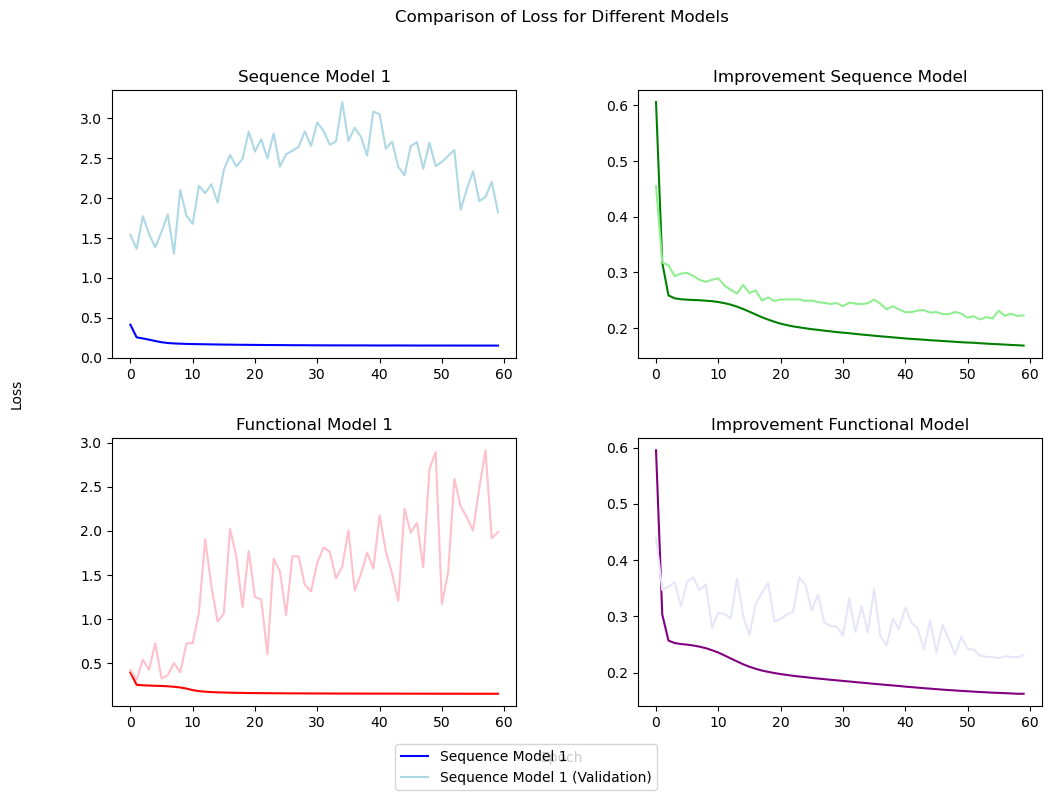

In [281]:
# create a figure and axis object
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# plot the data with different colors and titles
axs[0, 0].plot(history_seq_1_df['loss'], color='blue', label='Sequence Model 1')
axs[0, 0].plot(history_seq_1_df['val_loss'], color='lightblue', label='Sequence Model 1 (Validation)')
axs[0, 0].set_title('Sequence Model 1')

axs[0, 1].plot(history_seq_2_df['loss'], color='green', label='Sequence Model 2')
axs[0, 1].plot(history_seq_2_df['val_loss'], color='lightgreen', label='Sequence Model 2 (Validation)')
axs[0, 1].set_title('Improvement Sequence Model')

axs[1, 0].plot(history_func_1_df['loss'], color='red', label='Functional Model 1')
axs[1, 0].plot(history_func_1_df['val_loss'], color='pink', label='Functional Model 1 (Validation)')
axs[1, 0].set_title('Functional Model 1')

axs[1, 1].plot(history_func_2_df['loss'], color='purple', label='Functional Model 2')
axs[1, 1].plot(history_func_2_df['val_loss'], color='lavender', label='Functional Model 2 (Validation)')
axs[1, 1].set_title('Improvement Functional Model')

# add legend to the figure
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')

# set the overall title and axis labels
fig.suptitle('Comparison of Loss for Different Models')
fig.text(0.5, 0.04, 'Epoch', ha='center')
fig.text(0.04, 0.5, 'Loss', va='center', rotation='vertical')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# display the plot
plt.show()

In [282]:
seq_dict_1 = {
    'Test - precision' : precision_score(y_test, y_pred_seq_test_1),
    'Val - precision' : precision_score(y_val, y_pred_seq_val_1),
    'Test - accuracy' : accuracy_score(y_test, y_pred_seq_test_1),
    'Val - accuracy' : accuracy_score(y_val, y_pred_seq_val_1),
    'Loss - mean' : history_seq_1_df['loss'].mean(),
    'Val loss - mean' : history_seq_1_df['val_loss'].mean()}

seq_dict_2 = {
    'Test - precision' : precision_score(y_test, y_pred_seq_test_2),
    'Val - precision' : precision_score(y_val, y_pred_seq_val_2),
    'Test - accuracy' : accuracy_score(y_test, y_pred_seq_test_2),
    'Val - accuracy' : accuracy_score(y_val, y_pred_seq_val_2),
    'Loss - mean' : history_seq_2_df['loss'].mean(),
    'Val loss - mean' : history_seq_2_df['val_loss'].mean()}

func_dict_1 = {
    'Test - precision' : precision_score(y_test, y_pred_func_test_1),
    'Val - precision' : precision_score(y_val, y_pred_func_val_1),
    'Test - accuracy' : accuracy_score(y_test, y_pred_func_test_1),
    'Val - accuracy' : accuracy_score(y_val, y_pred_func_val_1),
    'Loss - mean' : history_func_1_df['loss'].mean(),
    'Val loss - mean' : history_func_1_df['val_loss'].mean()}

func_dict_2 = {
    'Test - precision' : precision_score(y_test, y_pred_func_test_2),
    'Val - precision' : precision_score(y_val, y_pred_func_val_2),
    'Test - accuracy' : accuracy_score(y_test, y_pred_func_test_2),
    'Val - accuracy' : accuracy_score(y_val, y_pred_func_val_2),
    'Loss - mean' : history_func_2_df['loss'].mean(),
    'Val loss - mean' : history_func_2_df['val_loss'].mean()}

In [283]:
all_reports ={}
all_reports['sequential_first'] = seq_dict_1
all_reports['sequential_improve'] = seq_dict_2
all_reports['functional_first'] = func_dict_1
all_reports['functional_improve'] = func_dict_2
report = pd.DataFrame(all_reports)
report = report.transpose()
report = report.sort_values(by='Val loss - mean', ascending=True)
report

,Test - precision,Val - precision,Test - accuracy,Val - accuracy,Loss - mean,Val loss - mean
sequential_improve,0.921419,0.908707,0.917687,0.910574,0.209793,0.252929
functional_improve,0.897806,0.890195,0.916967,0.909303,0.201996,0.295461
functional_first,0.911549,0.908014,0.903999,0.897012,0.172398,1.493209
sequential_first,0.903591,0.893489,0.909222,0.902098,0.167355,2.354588


Dari plot dan table diatas, ditemukan bahwa model sequential yang telah di improve merupakan model yang terbaik. Dimana nilai val_lossnya konvergen menurun dan stabil jika dibandingkan dengan model yang lain.

Selain itu juga didapatkan bahwa model sequential yang telah di improve juga memiliki nilai val precision yang cukup tinggi yaitu 89.1% dan nilai test precision yang cukup tinggi yaitu 90.4%. Yang berarti model termasuk model yang goodfit. Jika model diterapkan untuk memprediksi churn risk maka besar kemungkinan hasil prediksi dari model akan memiliki ketepatan 90.4% atau jika model memprediksi 10 customer memiliki resiko churn maka besar kemungkinan bahwa model memprediksi 9 customer dengan tepat dan hanya salah prediksi 1 orang saja.

# 9 - Model Saving

In [ ]:
sdgfia aefH

In [231]:
#with open('final_pipeline.pkl', 'wb') as file_1:
#  pickle.dump(final_pipeline, file_1)

#with open("list_num_cols.txt", "w") as file_2:
#    json.dump(num_cols, file_2)

#with open("list_catn_cols.txt", "w") as file_3:
#    json.dump(catn_cols, file_3)

In [232]:
# Summary of Model Sequential

model_sequential_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


In [233]:
# Freeze Model

model_sequential_2.trainable = False
model_sequential_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 913
Trainable params: 0
Non-trainable params: 913
_________________________________________________________________


In [234]:
# Save ANN Model
#model_sequential_2.save('churn_predict_model.h5')

# 10 - Model Inference

Di notebook baru

# 11 - Kesimpulan

Kesimpulan:

- Dari EDA saya temukan bahwa ada banya kolom yang tidak berpengaruh besar dalam pembuatan model. Hal ini dapat terjadi karena data yang ada pada kolom-kolom tersebut sangatlah balance. Sehingga tidak ada perbedaan besar antara data yang memiliki nilai churn risk 0 dan data yang memiliki nilai churn risk 1. Dan jika kita memaksakan kolom itu untuk masuk kedalam model, maka model akan menjadi lebih buruk. Karena model juga akan memperhitungkan kolom-kolom yang nilai datanya balance yang akan membuat model bingung.

- Dari Model Evaluation saya dapatkan bahwa dari 4 model yang telah saya buat, model Sequential yang telah di improve itu merupakan model yang terbaik. Hal ini dapat terjadi karena val_loss yang dimiliki model ini merupakan yang paling stabil. Selain itu karena nilai precision testnya 90% kita dapat mengatakan bahwa model cukup baik. karena jika kita memprediksi bahwa 100 customer beresiko untuk churn, maka besar kemungkinan bahwa 90 customer yang kita prediksi beresiko untuk churn itu merupakan prediksi yang tepat.

- Akan tetapi model yang saya miliki ini masih memiliki kelemahan yaitu model yang saya miliki tidak dapat memprediksi jika salah satu kolom dari data baru itu tidak sesuai dengan format data awal.

- Untuk improve model yang saya miliki saat ini, saya akan mencoba untuk menggunakan Activation function yang lain seperti tanh, Softmax dan Binary Step. Selain itu saya akan mencoba menerapkan batch normalization, Dropout dan Learning Rate untuk membandingkan apakah hasil menjadi lebih baik atau tidak.